In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from lmfit.models import Model, LorentzianModel, QuadraticModel, PolynomialModel, LinearModel, ConstantModel

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
def baseline(y, lam=10**9, p=0.01, niter=10):
    """
    For more information see: http://zanran_storage.s3.amazonaws.com/www.science.uva.nl/ContentPages/443199618.pdf
    lam: is a parameter for the smoothness and values between 10^2 and 10^9 are good for poitiv peaks
    p: is a paramter for aysymmetry and values between 0.001 and 0.1 are a good choice 
    """
    l = len(y)
    D = sparse.csc_matrix(np.diff(np.eye(l), 2))
    w = np.ones(l)
    for i in range(niter):
        W = sparse.spdiags(w, 0, l, l)
        Z = W + lam * D.dot(D.T)
        z = sparse.linalg.spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

# Beispiel

In [4]:
y = 1/np.exp(0.003*np.arange(0,1000)) + np.sin(0.03*np.arange(0,1000))

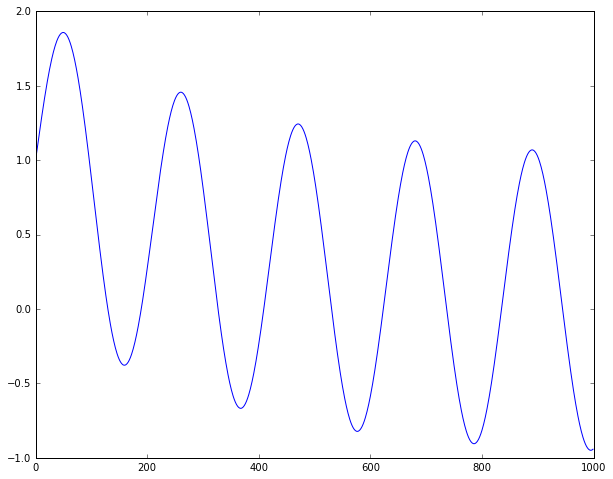

In [5]:
plt.plot(np.arange(0,1000),y)
plt.show()

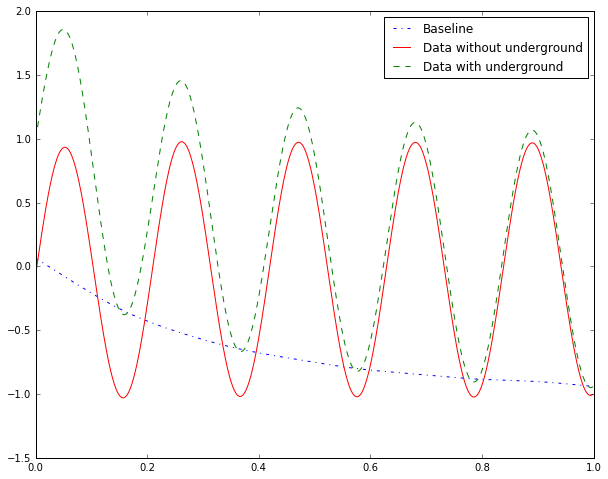

In [6]:
plt.plot(np.arange(0,1,0.001),baseline(y,p=0.001,lam=1.5317*10**6), '-.b', label="Baseline")
plt.plot(np.arange(0,1,0.001),y-baseline(y,p=0.001,lam=1.5317*10**6)-1,'-r', label="Data without underground")
plt.plot(np.arange(0,1,0.001),y, '--g', label="Data with underground")
plt.legend(loc="best")
plt.show()

# Datenanalyse

In [7]:
data_messung_1 = pd.read_csv("Messung_1.dat", delim_whitespace=True)

In [8]:
Prfl = -(data_messung_1.iloc[8].Amplitude/(np.exp(0.5)-1))
delta_Prfl = (0.1/(np.exp(0.5)-1))


In [9]:
data_messung_1["err"] = np.where(data_messung_1.Amplitude < 1, 0.01, 0.1)

In [10]:
data_messung_1["absorptionskoeffizient"] = 10/5*np.log(1-data_messung_1.Amplitude/Prfl)
data_messung_1["absorp_err"] = (((2*data_messung_1.err)/(data_messung_1.Amplitude-Prfl))**2 + ((2*delta_Prfl*data_messung_1.Amplitude)/(Prfl*data_messung_1.Amplitude-data_messung_1.Amplitude**2))**2)**0.5

In [11]:
data_messung_1.sort_values("Amplitude")[::-1]

,Nummer,J,K,nu_theo,nu_gemessen,Amplitude,err,absorptionskoeffizient,absorp_err
8,31,3,3,23.870,23.877,20.000,0.10,1.000000,0.007230
3,36,6,6,25.056,25.061,19.700,0.10,0.988161,0.007273
7,32,4,4,24.139,24.140,15.100,0.10,0.797263,0.008001
17,22,4,3,22.687,22.695,14.700,0.10,0.779769,0.008071
5,34,5,5,24.533,24.538,14.500,0.10,0.770964,0.008107
1,38,7,7,25.715,25.714,11.100,0.10,0.615029,0.008764
18,21,5,4,22.654,22.660,10.200,0.10,0.571632,0.008957
9,30,2,2,23.723,23.730,9.700,0.10,0.547110,0.009067
10,29,1,1,23.694,23.700,9.150,0.10,0.519784,0.009192
14,25,7,6,22.927,22.929,8.600,0.10,0.492079,0.009320


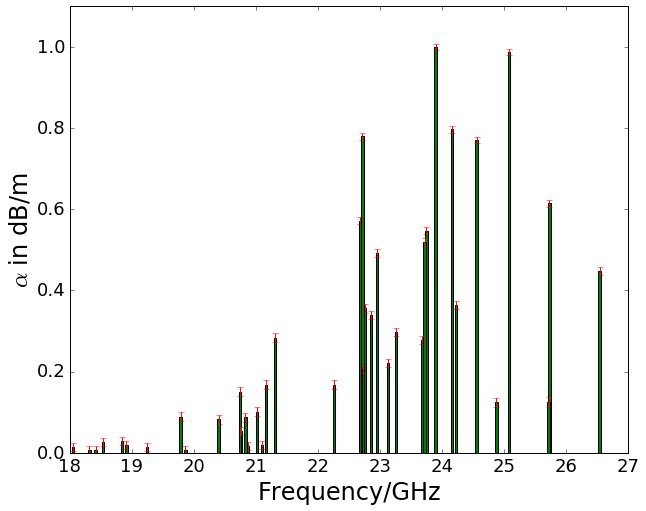

In [12]:
plt.bar(data_messung_1.nu_gemessen,data_messung_1.absorptionskoeffizient,0.04,
        yerr=data_messung_1.absorp_err,
        color="g",
        error_kw={'ecolor': 'r'})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel(r'$\alpha$ in dB/m', fontsize=24)
plt.xlabel("Frequency/GHz", fontsize=24)
plt.ylim([0,1.1])
plt.show()

# Hyperfinestrucktur

In [13]:
peak_4_4 = np.genfromtxt("Frederik_Henrik/Messung_2/H_F_4_4.tab", skip_header=1).T
peak_4_4_kalib_1 = np.genfromtxt("Frederik_Henrik/Messung_2/H_F_4_4_24_130.tab", skip_header=1).T
peak_4_4_kalib_2 = np.genfromtxt("Frederik_Henrik/Messung_2/H_F_4_4_24_145.tab", skip_header=1).T
peak_4_4_kalib_3 = np.genfromtxt("Frederik_Henrik/Messung_2/H_F_4_4_24_149.tab", skip_header=1).T

### Untergrund

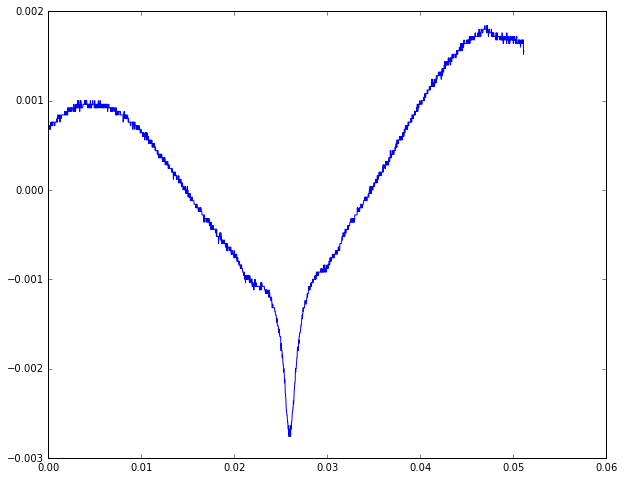

In [14]:
plt.plot(peak_4_4[0],peak_4_4[1])
plt.show()

In [15]:
submask_untergrund_hf_4_4_upper = np.where(peak_4_4[0] > 0.03, True, False)
submask_untergrund_hf_4_4_lower = np.where(peak_4_4[0] < 0.02, True,False)
mask_untergrund_hf_4_4 = np.where(np.logical_or(submask_untergrund_hf_4_4_upper,
                                                 submask_untergrund_hf_4_4_lower))

In [16]:
mod_underground_hf_4_4 = PolynomialModel(4)


In [17]:
pars_underground_hf_4_4 = mod_underground_hf_4_4.guess(peak_4_4[1][mask_untergrund_hf_4_4],
                                                         x=peak_4_4[0][mask_untergrund_hf_4_4])

In [18]:
out_underground_hf_4_4 = mod_underground_hf_4_4.fit(peak_4_4[1][mask_untergrund_hf_4_4],
                                                      params=pars_underground_hf_4_4,
                                                      x=peak_4_4[0][mask_untergrund_hf_4_4],
                                                      weights=1/0.0001)

In [19]:
print(out_underground_hf_4_4.fit_report(show_correl=False))

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 1645
    # variables        = 5
    chi-square         = 514.289
    reduced chi-square = 0.314
[[Variables]]
    c0:   0.00052059 +/- 6.32e-06 (1.21%) (init= 0.0005205947)
    c1:   0.24040414 +/- 0.001833 (0.76%) (init= 0.2404041)
    c2:  -32.9505331 +/- 0.157074 (0.48%) (init=-32.95053)
    c3:   1110.99435 +/- 4.758532 (0.43%) (init= 1110.994)
    c4:  -10777.6796 +/- 46.41823 (0.43%) (init=-10777.68)



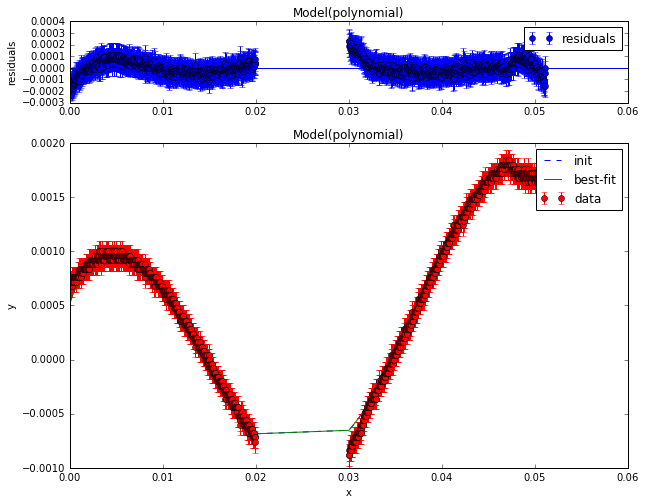

In [20]:
out_underground_hf_4_4.plot()
plt.show()

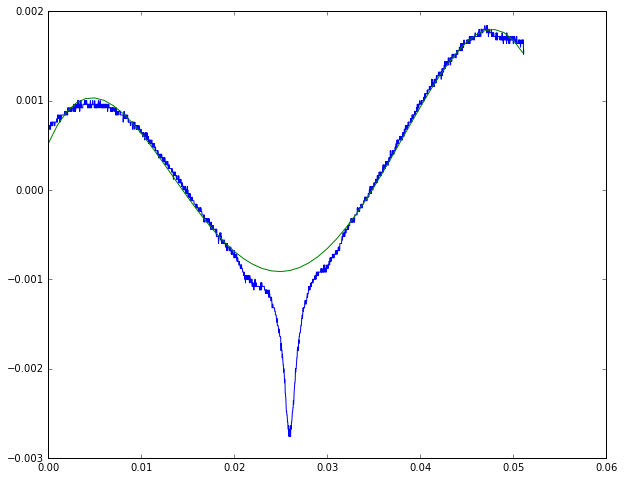

In [21]:
plt.plot(peak_4_4[0],peak_4_4[1])
plt.plot(np.arange(0,0.052,0.001),out_underground_hf_4_4.eval(x=np.arange(0,0.052,0.001)))
plt.show()

In [22]:
untergrund_hf_4_4 = out_underground_hf_4_4.eval(x=peak_4_4[0])

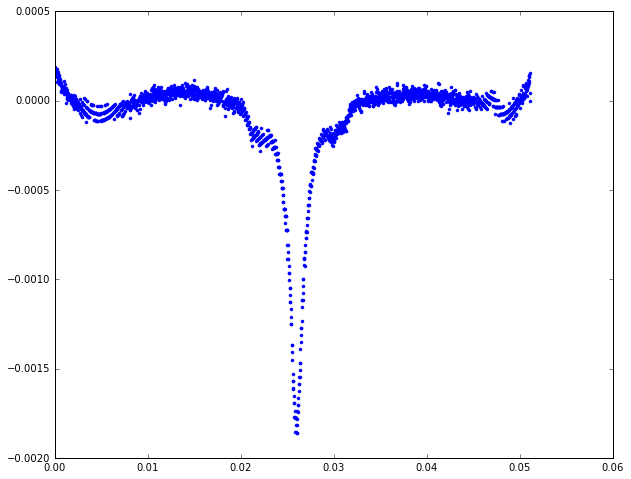

In [23]:
plt.plot(peak_4_4[0],peak_4_4[1]-untergrund_hf_4_4, ' .')
plt.show()

### Kalibration

#### Peak 1

In [24]:
kalib_hf_4_4_peak_1_new = peak_4_4_kalib_1[1]-untergrund_hf_4_4

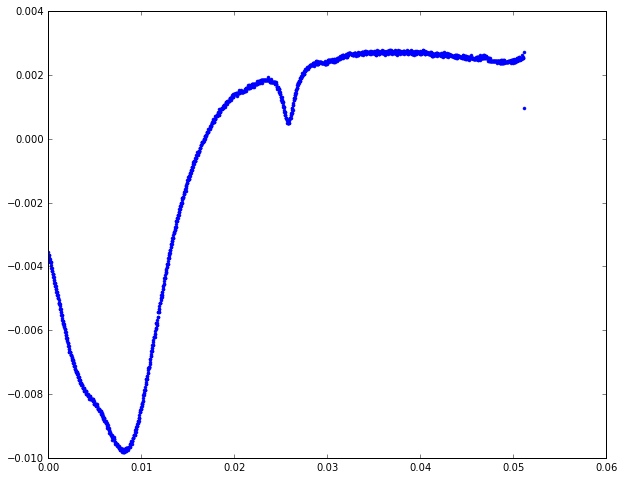

In [25]:
plt.plot(peak_4_4_kalib_1[0],kalib_hf_4_4_peak_1_new, ' .')
plt.show()

In [26]:
mask_kalib_hf_4_4_peak_1 = np.where(peak_4_4_kalib_1[0][np.where(peak_4_4_kalib_1[0] < 0.01)[0]] > 0.0045)[0]

In [27]:
mod_kalib_hf_4_4_peak_1 = LorentzianModel()
mod_kalib_const_hf_4_4_peak_1 = ConstantModel()

In [28]:
pars_kalib_hf_4_4_peak_1 = mod_kalib_hf_4_4_peak_1.guess(kalib_hf_4_4_peak_1_new[mask_kalib_hf_4_4_peak_1],
                                                         x=peak_4_4_kalib_1[0][mask_kalib_hf_4_4_peak_1])
pars_kalib_hf_4_4_peak_1["sigma"].set(0.001)
pars_kalib_hf_4_4_peak_1["center"].set(0.0081)
pars_kalib_hf_4_4_peak_1["amplitude"].set(-0.001)

In [29]:
out_kalib_hf_4_4_peak_1 = mod_kalib_hf_4_4_peak_1.fit(kalib_hf_4_4_peak_1_new[mask_kalib_hf_4_4_peak_1],
                                                      params=pars_kalib_hf_4_4_peak_1,
                                                      x=peak_4_4_kalib_1[0][mask_kalib_hf_4_4_peak_1],
                                                      weights=1/(kalib_hf_4_4_peak_1_new[mask_kalib_hf_4_4_peak_1]*0.02))

In [30]:
print(out_kalib_hf_4_4_peak_1.fit_report(show_correl=False))

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 219
    # variables        = 3
    chi-square         = 161.423
    reduced chi-square = 0.747
[[Variables]]
    sigma:       0.00685879 +/- 9.60e-05 (1.40%) (init= 0.001)
    fwhm:        0.01371758 +/- 0.000192 (1.40%)  == '2.0000000*sigma'
    amplitude:  -0.00020719 +/- 2.66e-06 (1.28%) (init=-0.001)
    center:      0.00784729 +/- 2.38e-05 (0.30%) (init= 0.0081)



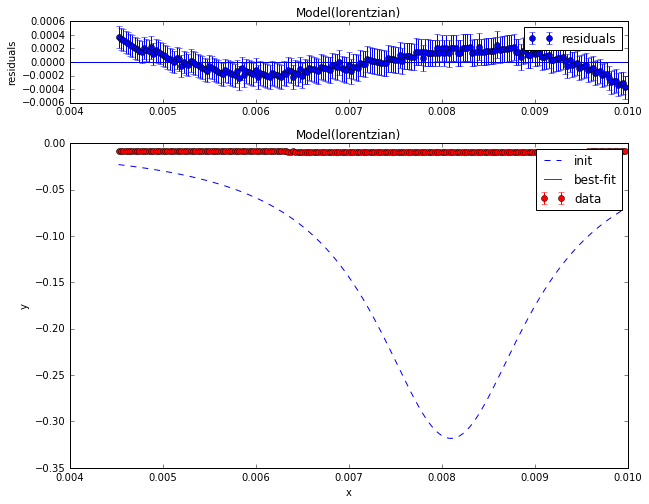

In [31]:
out_kalib_hf_4_4_peak_1.plot()
plt.show()

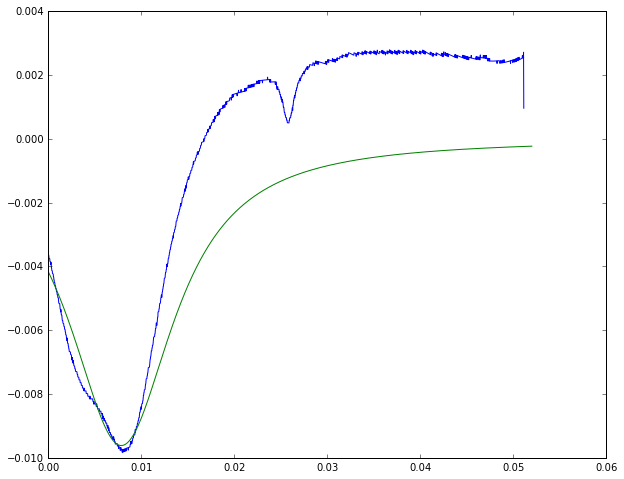

In [32]:
plt.plot(peak_4_4_kalib_1[0],kalib_hf_4_4_peak_1_new)
plt.plot(np.arange(0,0.052,0.00001),out_kalib_hf_4_4_peak_1.eval(x=np.arange(0,0.052,0.00001)))
plt.show()

#### Peak 2

In [33]:
kalib_hf_4_4_peak_2_new = peak_4_4_kalib_2[1]-untergrund_hf_4_4

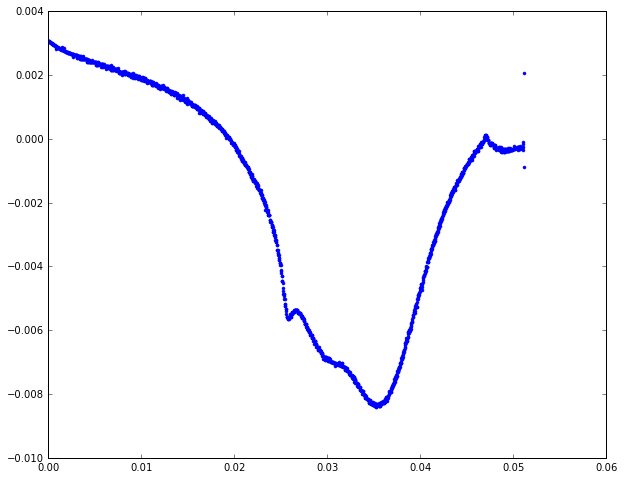

In [34]:
plt.plot(peak_4_4_kalib_2[0],kalib_hf_4_4_peak_2_new, ' .')
plt.show()

In [35]:
mask_kalib_hf_4_4_peak_2 = np.where(peak_4_4_kalib_2[0][np.where(peak_4_4_kalib_2[0] < 0.043)[0]] > 0.0324)[0]

In [36]:
mod_kalib_hf_4_4_peak_2 = LorentzianModel()
mod_kalib_const_hf_4_4_peak_2 = ConstantModel()

In [37]:
pars_kalib_hf_4_4_peak_2 = mod_kalib_hf_4_4_peak_2.guess(kalib_hf_4_4_peak_2_new[mask_kalib_hf_4_4_peak_2],
                                                         x=peak_4_4_kalib_2[0][mask_kalib_hf_4_4_peak_2])
pars_kalib_hf_4_4_peak_2["sigma"].set(0.001)
pars_kalib_hf_4_4_peak_2["center"].set(0.0081)
pars_kalib_hf_4_4_peak_2["amplitude"].set(-0.001)

In [38]:
out_kalib_hf_4_4_peak_2 = mod_kalib_hf_4_4_peak_2.fit(kalib_hf_4_4_peak_2_new[mask_kalib_hf_4_4_peak_2],
                                                      params=pars_kalib_hf_4_4_peak_2,
                                                      x=peak_4_4_kalib_2[0][mask_kalib_hf_4_4_peak_2],
                                                      weights=1/(kalib_hf_4_4_peak_2_new[mask_kalib_hf_4_4_peak_2]*0.02))

In [39]:
print(out_kalib_hf_4_4_peak_2.fit_report(show_correl=False))

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # function evals   = 131
    # data points      = 423
    # variables        = 3
    chi-square         = 4348.240
    reduced chi-square = 10.353
[[Variables]]
    sigma:       0.00461866 +/- 3.81e-05 (0.83%) (init= 0.001)
    fwhm:        0.00923732 +/- 7.62e-05 (0.83%)  == '2.0000000*sigma'
    amplitude:  -0.00012845 +/- 8.21e-07 (0.64%) (init=-0.001)
    center:      0.03531364 +/- 3.07e-05 (0.09%) (init= 0.0081)



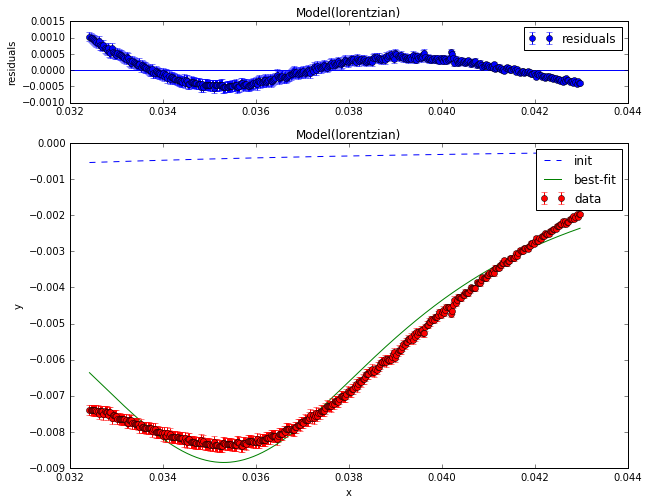

In [40]:
out_kalib_hf_4_4_peak_2.plot()
plt.show()

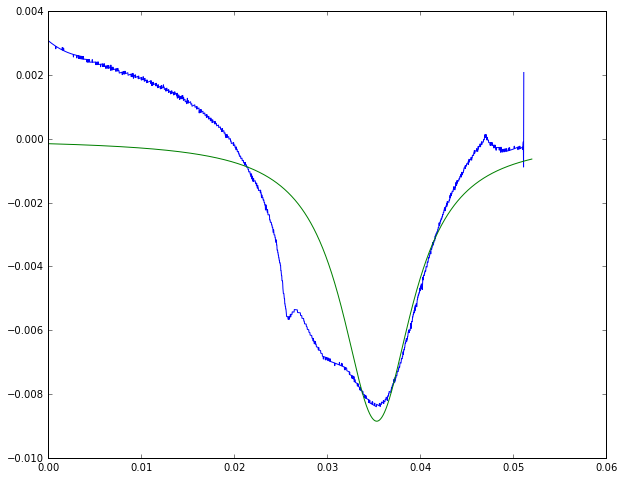

In [41]:
plt.plot(peak_4_4_kalib_2[0],kalib_hf_4_4_peak_2_new)
plt.plot(np.arange(0,0.052,0.00001),out_kalib_hf_4_4_peak_2.eval(x=np.arange(0,0.052,0.00001)))
plt.show()

#### Peak 3

In [42]:
kalib_hf_4_4_peak_3_new = peak_4_4_kalib_3[1]-untergrund_hf_4_4

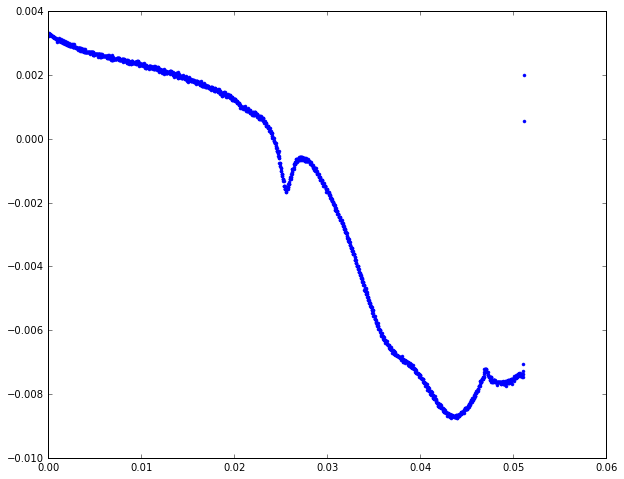

In [43]:
plt.plot(peak_4_4_kalib_3[0],kalib_hf_4_4_peak_3_new, ' .')
plt.show()

In [44]:
mask_kalib_hf_4_4_peak_3 = np.where(peak_4_4_kalib_3[0][np.where(peak_4_4_kalib_3[0] < 0.0469)[0]] > 0.04)[0]

In [45]:
mod_kalib_hf_4_4_peak_3 = LorentzianModel()
mod_kalib_const_hf_4_4_peak_3 = ConstantModel()

In [46]:
pars_kalib_hf_4_4_peak_3 = mod_kalib_hf_4_4_peak_3.guess(kalib_hf_4_4_peak_3_new[mask_kalib_hf_4_4_peak_3],
                                                         x=peak_4_4_kalib_3[0][mask_kalib_hf_4_4_peak_3])
pars_kalib_hf_4_4_peak_3["sigma"].set(0.001)
pars_kalib_hf_4_4_peak_3["center"].set(0.0081)
pars_kalib_hf_4_4_peak_3["amplitude"].set(-0.001)

In [47]:
out_kalib_hf_4_4_peak_3 = mod_kalib_hf_4_4_peak_3.fit(kalib_hf_4_4_peak_3_new[mask_kalib_hf_4_4_peak_3],
                                                      params=pars_kalib_hf_4_4_peak_3,
                                                      x=peak_4_4_kalib_3[0][mask_kalib_hf_4_4_peak_3],
                                                      weights=1/(kalib_hf_4_4_peak_3_new[mask_kalib_hf_4_4_peak_3]*0.02))

In [48]:
print(out_kalib_hf_4_4_peak_3.fit_report(show_correl=False))

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # function evals   = 825
    # data points      = 275
    # variables        = 3
    chi-square         = 24.937
    reduced chi-square = 0.092
[[Variables]]
    sigma:       0.00822612 +/- 3.32e-05 (0.40%) (init= 0.001)
    fwhm:        0.01645225 +/- 6.64e-05 (0.40%)  == '2.0000000*sigma'
    amplitude:  -0.00022417 +/- 8.13e-07 (0.36%) (init=-0.001)
    center:      0.04352171 +/- 6.87e-06 (0.02%) (init= 0.0081)



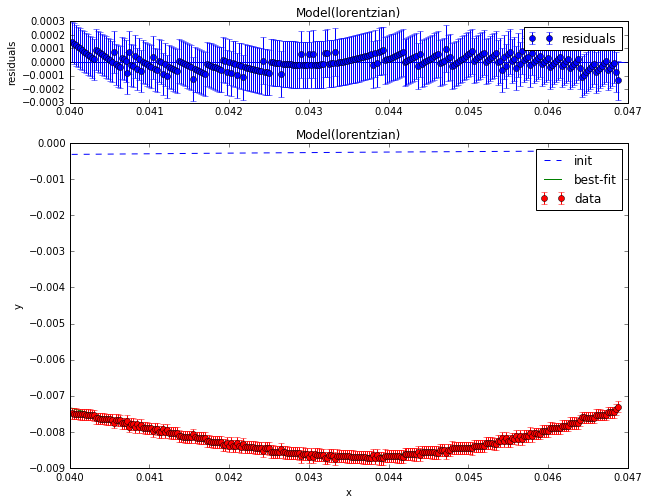

In [49]:
out_kalib_hf_4_4_peak_3.plot()
plt.show()

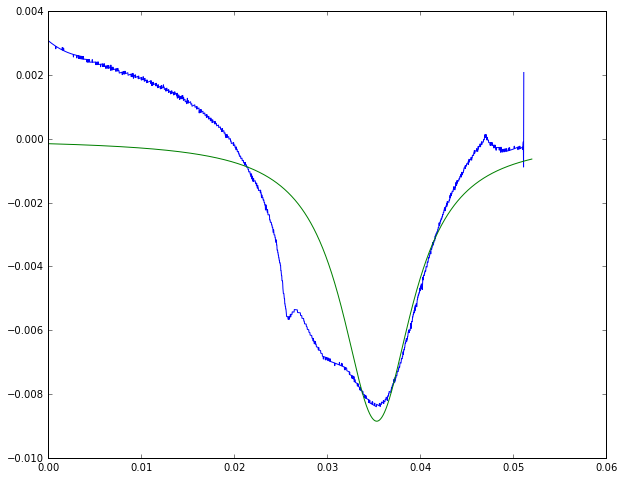

In [50]:
plt.plot(peak_4_4_kalib_2[0],kalib_hf_4_4_peak_2_new)
plt.plot(np.arange(0,0.052,0.00001),out_kalib_hf_4_4_peak_2.eval(x=np.arange(0,0.052,0.00001)))
plt.show()

# Druck

In [51]:
kalib_druck_1 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_23_888_kalib_1.tab", skip_header=1).T
kalib_druck_2 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_23_880_kalib_2.tab", skip_header=1).T
kalib_druck_3 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_23_870_kalib_4.tab", skip_header=1).T

## Kalibration

### Peak 1

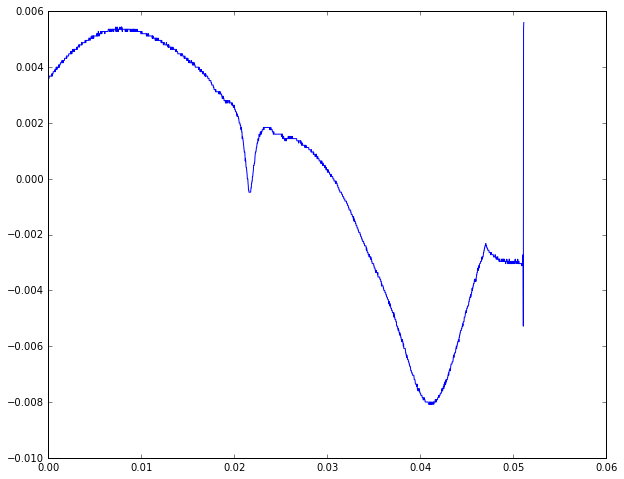

In [52]:
plt.plot(kalib_druck_1[0],kalib_druck_1[1])
plt.show()

In [53]:
mask_kalib_druck_1 = np.where(kalib_druck_1[0][np.where(kalib_druck_1[0] < 0.046)[0]] > 0.037)[0]

In [54]:
mod_druck_kalib_1 = LorentzianModel()

In [55]:
pars_druck_kalib_1 = mod_druck_kalib_1.guess(kalib_druck_1[1][mask_kalib_druck_1],x=kalib_druck_1[0][mask_kalib_druck_1])

In [56]:
out_druck_kalib_1 = mod_druck_kalib_1.fit(kalib_druck_1[1][mask_kalib_druck_1],
                                          params=pars_druck_kalib_1,
                                          x=kalib_druck_1[0][mask_kalib_druck_1],
                                          weights=1/(kalib_druck_1[1][mask_kalib_druck_1]*0.02))

In [57]:
print(out_druck_kalib_1.fit_report(show_correl=False))

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # function evals   = 40
    # data points      = 359
    # variables        = 3
    chi-square         = 342.963
    reduced chi-square = 0.963
[[Variables]]
    sigma:       0.00461452 +/- 1.52e-05 (0.33%) (init= 0.004475)
    fwhm:        0.00922904 +/- 3.04e-05 (0.33%)  == '2.0000000*sigma'
    amplitude:  -0.00011842 +/- 2.63e-07 (0.22%) (init= 5.012e-05)
    center:      0.04101482 +/- 6.72e-06 (0.02%) (init= 0.04239009)



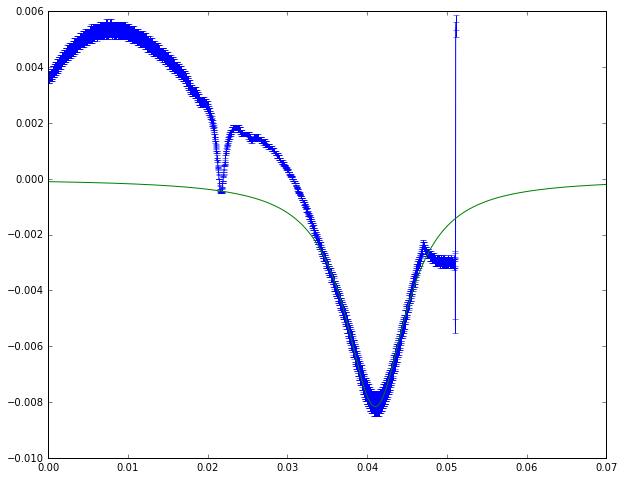

In [58]:
plt.errorbar(kalib_druck_1[0],kalib_druck_1[1],yerr=kalib_druck_1[1]*0.05)
plt.plot(np.arange(0,0.07,0.0001),out_druck_kalib_1.eval(x=np.arange(0,0.07,0.0001)))
plt.show()

### Peak 2

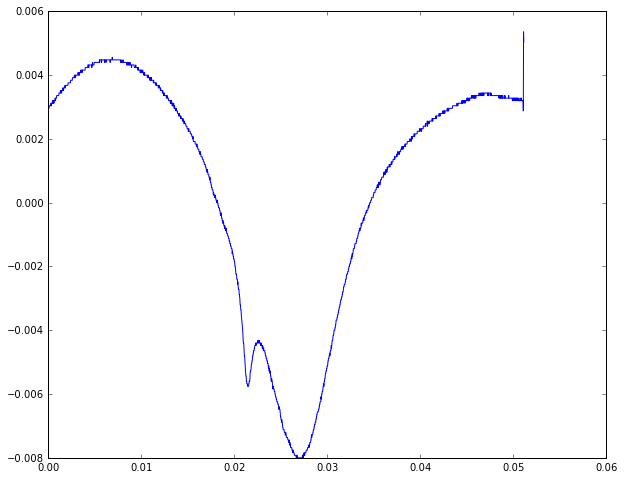

In [59]:
plt.plot(kalib_druck_2[0],kalib_druck_2[1])
plt.show()

In [60]:
mask_kalib_druck_2 = np.where(kalib_druck_2[0][np.where(kalib_druck_2[0] < 0.0309)[0]] > 0.024)[0]

In [61]:
mod_druck_kalib_2 = LorentzianModel()

In [62]:
pars_druck_kalib_2 = mod_druck_kalib_2.guess(kalib_druck_2[1][mask_kalib_druck_2],x=kalib_druck_2[0][mask_kalib_druck_2])
pars_druck_kalib_2["center"].set(0.0269, vary=False)

In [63]:
out_druck_kalib_2 = mod_druck_kalib_2.fit(kalib_druck_2[1][mask_kalib_druck_2],
                                          params=pars_druck_kalib_2,
                                          x=kalib_druck_2[0][mask_kalib_druck_2],
                                          weights=1/(kalib_druck_2[1][mask_kalib_druck_2]*0.02))

In [64]:
print(out_druck_kalib_2.fit_report())

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 275
    # variables        = 2
    chi-square         = 307.737
    reduced chi-square = 1.127
[[Variables]]
    sigma:       0.00403523 +/- 1.76e-05 (0.44%) (init= 0.003425)
    fwhm:        0.00807046 +/- 3.52e-05 (0.44%)  == '2.0000000*sigma'
    amplitude:  -0.00010306 +/- 3.18e-07 (0.31%) (init= 3.562e-05)
    center:      0.0269 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, amplitude)          = -0.910 



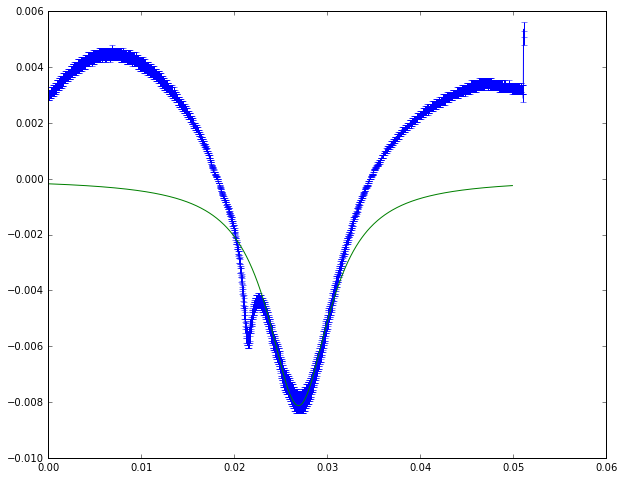

In [65]:
plt.errorbar(kalib_druck_2[0],kalib_druck_2[1],yerr=kalib_druck_2[1]*0.05)
plt.plot(np.arange(0,0.05,0.0001),out_druck_kalib_2.eval(x=np.arange(0,0.05,0.0001)))
plt.show()

### Peak 3

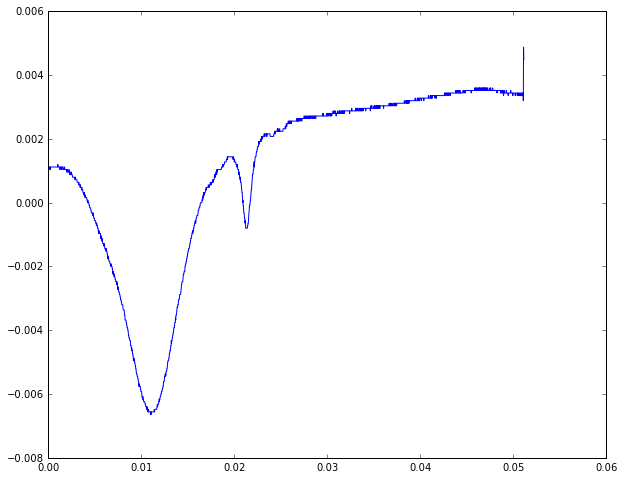

In [66]:
plt.plot(kalib_druck_3[0],kalib_druck_3[1])
plt.show()

In [67]:
mask_kalib_druck_3 = np.where(kalib_druck_3[0][np.where(kalib_druck_3[0] < 0.014)[0]] > 0.008)[0]

In [68]:
mod_druck_kalib_3 = LorentzianModel()

In [69]:
pars_druck_kalib_3 = mod_druck_kalib_3.guess(kalib_druck_3[1][mask_kalib_druck_3],x=kalib_druck_3[0][mask_kalib_druck_3])
#pars_druck_kalib_3["amplitude"].set(-0.00015)
pars_druck_kalib_3["center"].set(0.01125)

In [70]:
out_druck_kalib_3 = mod_druck_kalib_3.fit(kalib_druck_3[1][mask_kalib_druck_3],
                                          params=pars_druck_kalib_3,
                                          x=kalib_druck_3[0][mask_kalib_druck_3],
                                          weights=1/(kalib_druck_3[1][mask_kalib_druck_3]*0.02))

In [71]:
print(out_druck_kalib_3.fit_report())

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 239
    # variables        = 3
    chi-square         = 266.165
    reduced chi-square = 1.128
[[Variables]]
    sigma:       0.00298962 +/- 1.26e-05 (0.42%) (init= 0.002975)
    fwhm:        0.00597924 +/- 2.53e-05 (0.42%)  == '2.0000000*sigma'
    amplitude:  -6.2858e-05 +/- 1.75e-07 (0.28%) (init= 2.5585e-05)
    center:      0.01103083 +/- 5.45e-06 (0.05%) (init= 0.01125)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, amplitude)          = -0.869 



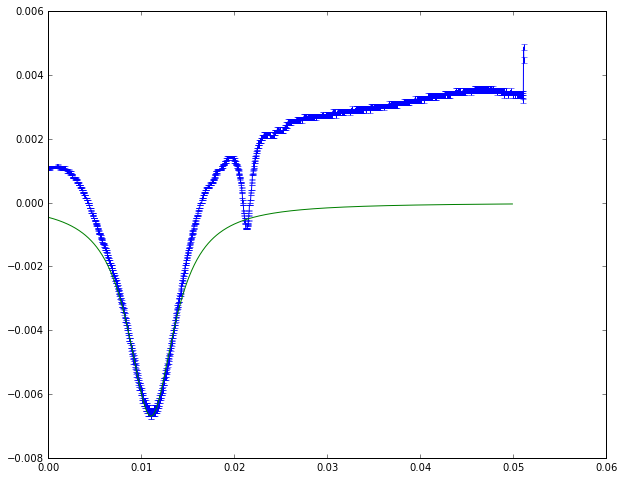

In [72]:
plt.errorbar(kalib_druck_3[0],kalib_druck_3[1],yerr=kalib_druck_3[1]*0.02)
plt.plot(np.arange(0,0.05,0.0001),out_druck_kalib_3.eval(x=np.arange(0,0.05,0.0001)))
plt.show()

### Linerare Fit

In [73]:
kalib_druck_frequency = [23.888,23.880,23.870]
kalib_druck_time = [0.04101482,0.0269,0.01103083]
kalib_druck_frequency_err = [0.000372,0.000424,0.000285]

In [74]:
mod_kalib_druck = LinearModel()

In [75]:
pars_kalib_druck = mod_kalib_druck.guess(kalib_druck_frequency, x=kalib_druck_time)

In [76]:
out_kalib_druck = mod_kalib_druck.fit(np.array(kalib_druck_frequency),
                                          params=pars_kalib_druck,
                                          x=np.array(kalib_druck_time),
                                          weights=1/np.array(kalib_druck_frequency_err))

In [77]:
print(out_kalib_druck.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 9
    # data points      = 3
    # variables        = 2
    chi-square         = 0.948
    reduced chi-square = 0.948
[[Variables]]
    slope:       0.60265693 +/- 0.015032 (2.49%) (init= 0.6009355)
    intercept:   23.8634287 +/- 0.000399 (0.00%) (init= 23.86352)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -0.873 



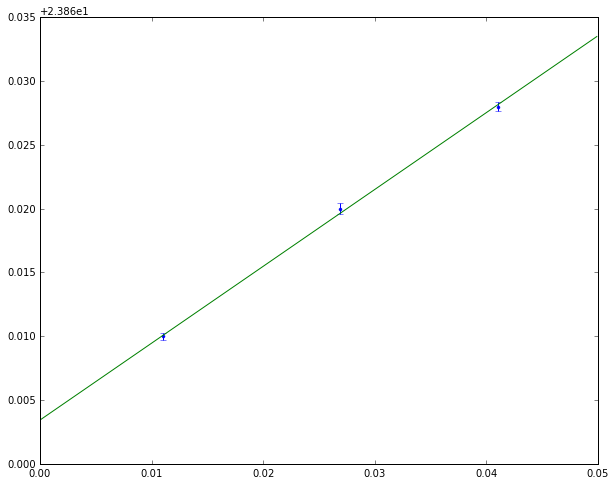

In [78]:
plt.errorbar(kalib_druck_time,kalib_druck_frequency,yerr=np.array(kalib_druck_frequency_err), fmt=' .')
plt.plot(np.arange(0,0.05,0.0001),out_kalib_druck.eval(x=np.arange(0,0.05,0.0001)))
plt.show()

## Druck abhängigkeit

In [79]:
druck_2 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_2.tab", skip_header=1).T
druck_3 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_3.tab", skip_header=1).T
druck_4 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_4.tab", skip_header=1).T
druck_5 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_5.tab", skip_header=1).T
druck_6 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_6.tab", skip_header=1).T
druck_7 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_7.tab", skip_header=1).T
druck_8 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_8.tab", skip_header=1).T
druck_9 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_9.tab", skip_header=1).T
druck_10 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_10.tab", skip_header=1).T
druck_11 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_11.tab", skip_header=1).T
druck_12 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_12.tab", skip_header=1).T
druck_13 = np.genfromtxt("Frederik_Henrik/Messung_3/3_3_breite_13.tab", skip_header=1).T

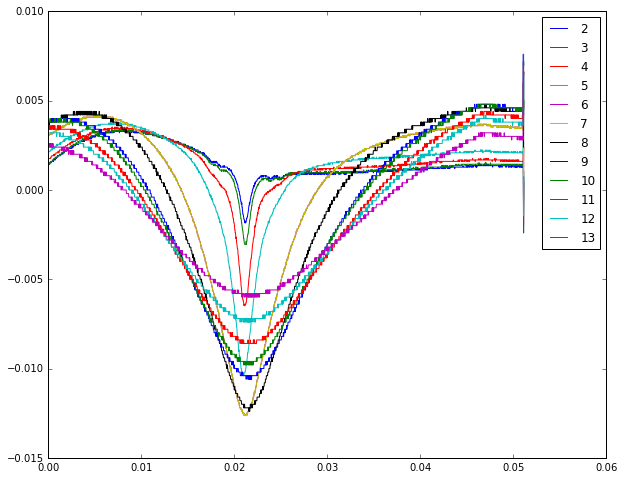

In [80]:
plt.plot(druck_2[0],druck_2[1], label="2")
plt.plot(druck_3[0],druck_3[1], label="3")
plt.plot(druck_4[0],druck_4[1], label="4")
plt.plot(druck_5[0],druck_5[1], label="5")
plt.plot(druck_7[0],druck_7[1], label="6")
plt.plot(druck_7[0],druck_7[1], label="7")
plt.plot(druck_8[0],druck_8[1], label="8")
plt.plot(druck_9[0],druck_9[1], label="9")
plt.plot(druck_10[0],druck_10[1], label="10")
plt.plot(druck_11[0],druck_11[1], label="11")
plt.plot(druck_12[0],druck_12[1], label="12")
plt.plot(druck_13[0],druck_13[1], label="13")
plt.legend(loc="best")
plt.show()

### Druck 2

#### Untergrund

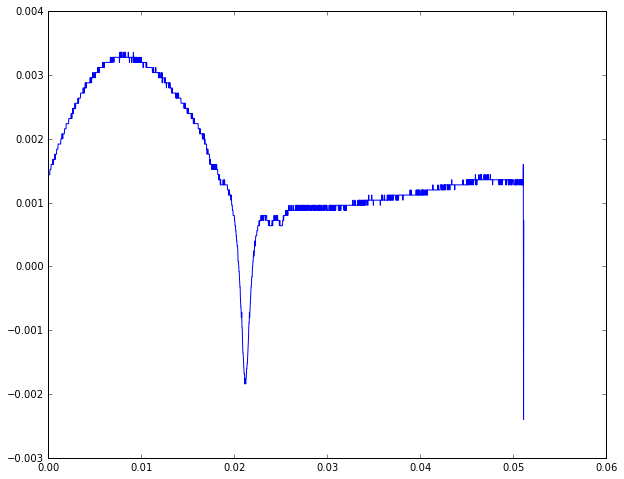

In [81]:
plt.plot(druck_2[0],druck_2[1])
plt.show()

In [82]:
submask_untergrund_druck_2_1 = np.where(druck_2[0] > 0.026, True, False)
submask_untergrund_druck_2_2 = np.where(druck_2[0] < 0.017, True,False)
mask_untergrund_druck_2 = np.where(np.logical_or(submask_untergrund_druck_2_1,
                                                 submask_untergrund_druck_2_2))

In [83]:
mod_underground_druck_2 = PolynomialModel(6)

In [84]:
pars_underground_druck_2 = mod_underground_druck_2.guess(druck_2[1][mask_untergrund_druck_2],
                                                         x=druck_2[0][mask_untergrund_druck_2])

In [85]:
out_underground_druck_2 = mod_underground_druck_2.fit(druck_2[1][mask_untergrund_druck_2],
                                                      params=pars_underground_druck_2,
                                                      x=druck_2[0][mask_untergrund_druck_2],
                                                      weights=1/0.0001)

In [86]:
print(out_underground_druck_2.fit_report())

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # function evals   = 10
    # data points      = 1685
    # variables        = 7
    chi-square         = 1985.587
    reduced chi-square = 1.183
[[Variables]]
    c0:   0.00127978 +/- 1.69e-05 (1.32%) (init= 0.001279786)
    c1:   0.59335626 +/- 0.009333 (1.57%) (init= 0.5933563)
    c2:  -54.9230219 +/- 1.606777 (2.93%) (init=-54.92302)
    c3:   1519.22208 +/- 119.4330 (7.86%) (init= 1519.222)
    c4:  -5419.51629 +/- 4.31e+03 (79.51%) (init=-5419.516)
    c5:  -3.2252e+05 +/- 7.41e+04 (22.98%) (init=-322521.7)
    c6:   3.3544e+06 +/- 4.86e+05 (14.49%) (init= 3354381)
[[Correlations]] (unreported correlations are <  0.100)
    C(c5, c6)                    = -0.996 
    C(c4, c5)                    = -0.994 
    C(c3, c4)                    = -0.989 
    C(c2, c3)                    = -0.981 
    C(c4, c6)                    =  0.980 
    C(c3, c5)                    =  0.967 
    C(c1, c2)                    = -0.965 
    C(c2,

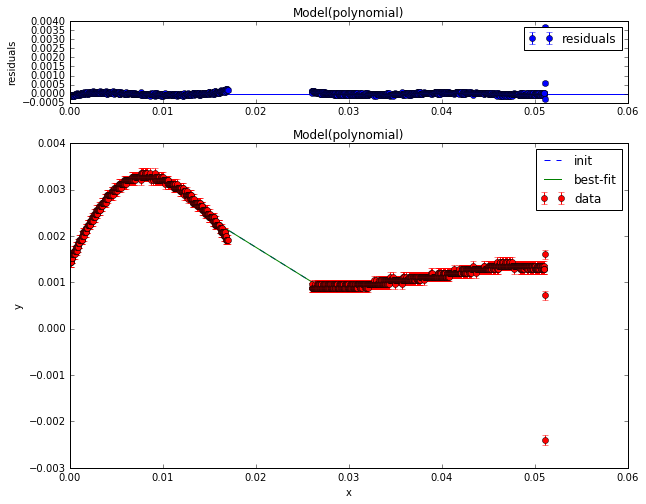

In [87]:
out_underground_druck_2.plot()
plt.show()

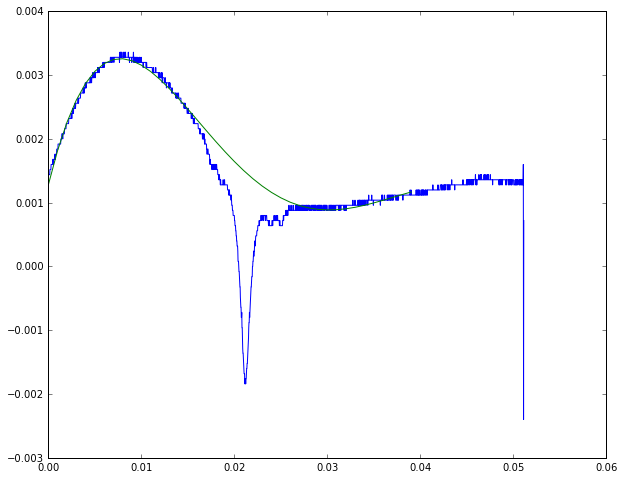

In [88]:
plt.plot(druck_2[0],druck_2[1])
plt.plot(np.arange(0,0.04,0.001),out_underground_druck_2.eval(x=np.arange(0,0.04,0.001)))
plt.show()

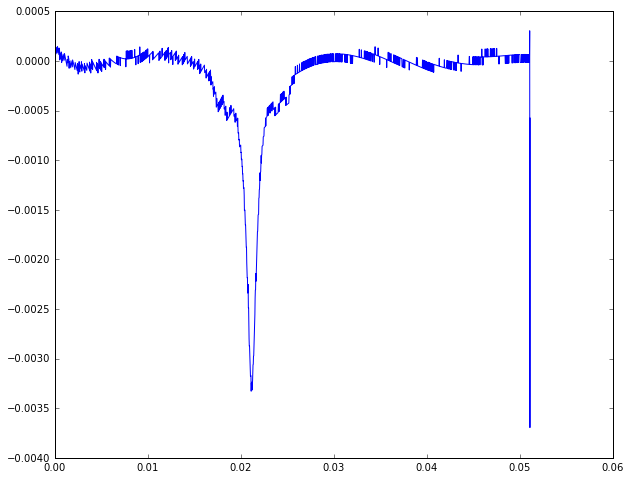

In [89]:
plt.plot(druck_2[0],druck_2[1]-out_underground_druck_2.eval(x=druck_2[0]))
plt.show()

In [90]:
druck_untergrund = out_underground_druck_2.eval(x=druck_2[0])

In [91]:
druck_2_new = druck_2[1]-out_underground_druck_2.eval(x=druck_2[0])

#### Fit

In [92]:
mask_druck_2 = np.where(druck_2[0][np.where(druck_2[0] < 0.0222)[0]] > 0.0200)[0]

In [93]:
mod_druck_2 = LorentzianModel()

In [94]:
pars_druck_2 = mod_druck_2.guess(druck_2_new[mask_druck_2],x=druck_2[0][mask_druck_2])
pars_druck_2["amplitude"].set(-0.0001)
pars_druck_2["center"].set(0.0211)
pars_druck_2["sigma"].set(0.01)

In [95]:
out_druck_2 = mod_druck_2.fit(druck_2_new[mask_druck_2], params=pars_druck_2, x=druck_2[0][mask_druck_2], weights=1/(druck_2_new[mask_druck_2]*0.03))

In [96]:
print(out_druck_2.fit_report())

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # function evals   = 73
    # data points      = 87
    # variables        = 3
    chi-square         = 88.358
    reduced chi-square = 1.052
[[Variables]]
    sigma:       0.00069943 +/- 5.00e-06 (0.71%) (init= 0.01)
    fwhm:        0.00139886 +/- 1.00e-05 (0.71%)  == '2.0000000*sigma'
    amplitude:  -7.0158e-06 +/- 2.73e-08 (0.39%) (init=-0.0001)
    center:      0.02117319 +/- 2.77e-06 (0.01%) (init= 0.0211)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, amplitude)          = -0.527 
    C(amplitude, center)         = -0.110 



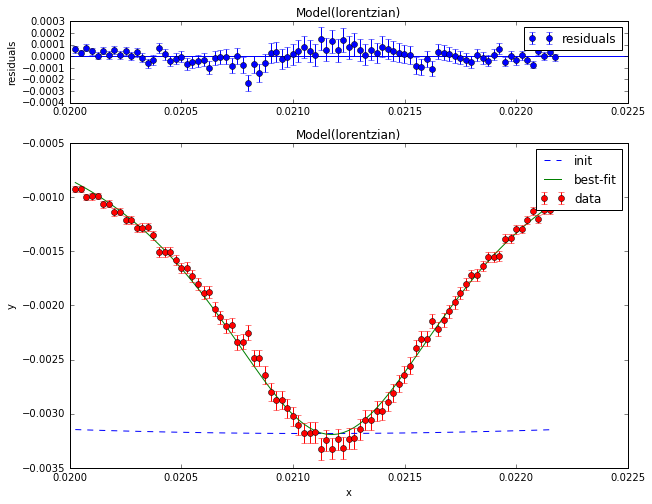

In [97]:
out_druck_2.plot()
plt.show()

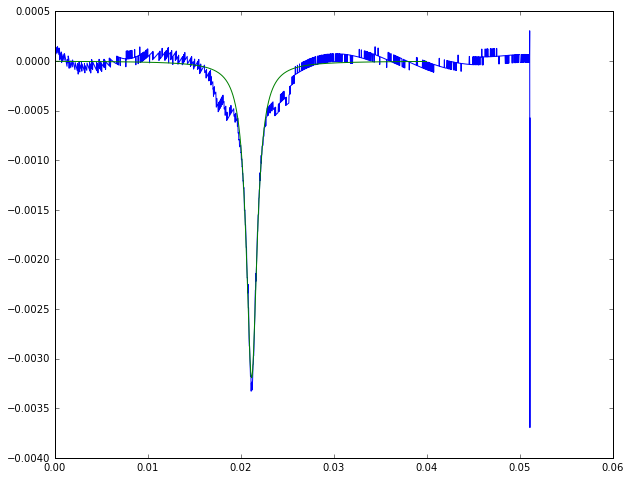

In [98]:
plt.plot(druck_2[0],druck_2_new)
plt.plot(np.arange(0,0.04,0.00001),out_druck_2.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 3

#### Untergrund

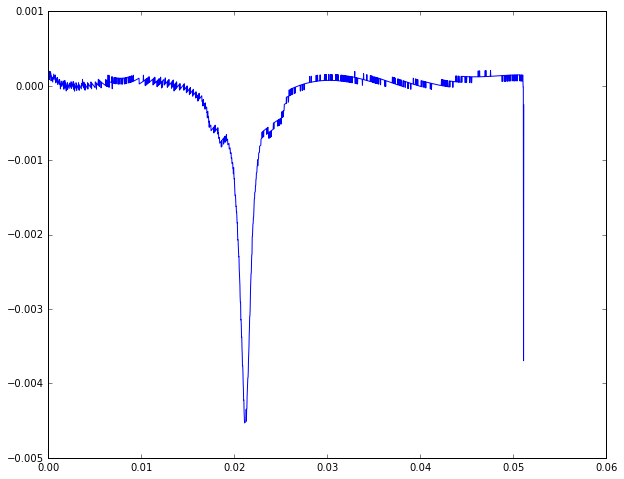

In [99]:
plt.plot(druck_3[0],druck_3[1]-out_underground_druck_2.eval(x=druck_2[0]))
plt.show()

In [100]:
druck_3_new = druck_3[1]-out_underground_druck_2.eval(x=druck_2[0])

#### Fit

In [101]:
mask_druck_3 = np.where(druck_3[0][np.where(druck_3[0] < 0.0225)[0]] > 0.01975)[0]

In [102]:
mod_druck_3 = LorentzianModel()
mod_const_druck_3 = ConstantModel()

In [103]:
pars_druck_3 = mod_druck_3.guess(druck_3_new[mask_druck_3],x=druck_3[0][mask_druck_3])
pars_druck_3 += mod_const_druck_3.make_params()
pars_druck_3["c"].set(-0.01)
pars_druck_3["amplitude"].set(-0.0001)
pars_druck_3["center"].set(0.0211)
pars_druck_3["sigma"].set(0.0001)

In [104]:
mod_composit_druck_3 = mod_druck_3 + mod_const_druck_3

In [105]:
out_druck_3 = mod_composit_druck_3.fit(druck_3_new[mask_druck_3], params=pars_druck_3, x=druck_3[0][mask_druck_3], weights=1/(druck_3_new[mask_druck_3]*0.03))

In [106]:
print(out_druck_3.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 48
    # data points      = 109
    # variables        = 4
    chi-square         = 73.782
    reduced chi-square = 0.703
[[Variables]]
    sigma:       0.00068259 +/- 8.61e-06 (1.26%) (init= 0.0001)
    fwhm:        0.00136519 +/- 1.72e-05 (1.26%)  == '2.0000000*sigma'
    amplitude:  -9.3328e-06 +/- 1.38e-07 (1.48%) (init=-0.0001)
    center:      0.02117208 +/- 2.14e-06 (0.01%) (init= 0.0211)
    c:          -0.00016069 +/- 2.50e-05 (15.57%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.983 
    C(sigma, amplitude)          = -0.924 
    C(sigma, c)                  =  0.921 



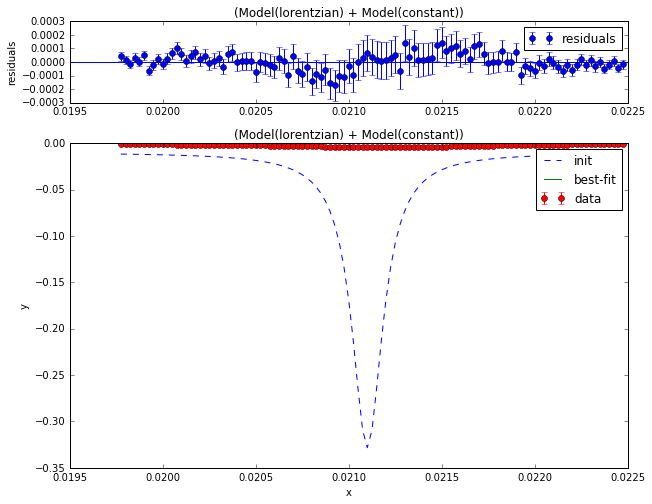

In [107]:
out_druck_3.plot()
plt.show()

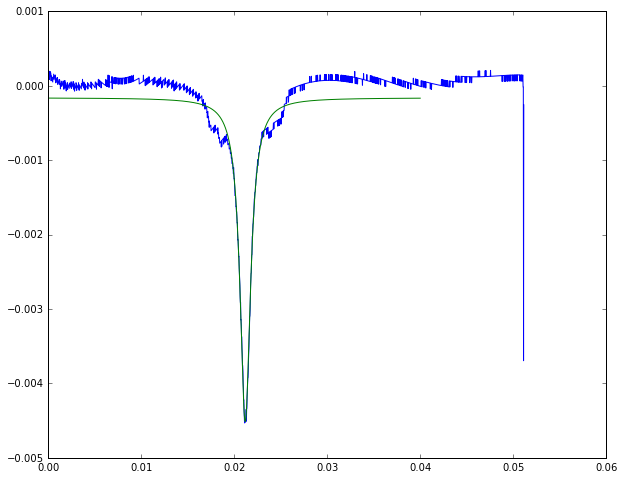

In [108]:
plt.plot(druck_3[0],druck_3_new)
plt.plot(np.arange(0,0.04,0.00001),out_druck_3.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 4

#### Untergrund

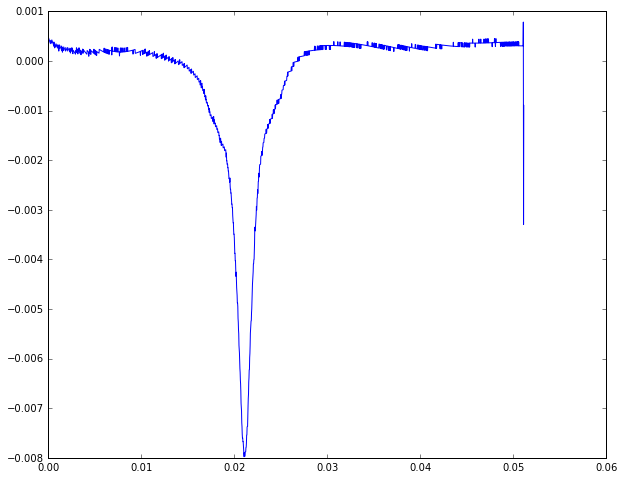

In [109]:
plt.plot(druck_4[0],druck_4[1]-out_underground_druck_2.eval(x=druck_4[0]))
plt.show()

In [110]:
druck_4_new = druck_4[1]-out_underground_druck_2.eval(x=druck_4[0])

#### Fit

In [111]:
mask_druck_4 = np.where(druck_4[0][np.where(druck_4[0] < 0.0230)[0]] > 0.01915)[0]

In [112]:
mod_druck_4 = LorentzianModel()
mod_const_druck_4 = ConstantModel()

In [113]:
pars_druck_4 = mod_druck_4.guess(druck_4_new[mask_druck_4],x=druck_4[0][mask_druck_4])
pars_druck_4 += mod_const_druck_4.make_params()
pars_druck_4["c"].set(-0.01)
pars_druck_4["amplitude"].set(-0.0001)
pars_druck_4["center"].set(0.0211)
pars_druck_4["sigma"].set(0.01)

In [114]:
mod_composit_druck_4 = mod_druck_4 + mod_const_druck_4

In [115]:
out_druck_4 = mod_composit_druck_4.fit(druck_4_new[mask_druck_4], params=pars_druck_4, x=druck_4[0][mask_druck_4], weights=1/(druck_4_new[mask_druck_4]*0.03))

In [116]:
print(out_druck_4.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 133
    # data points      = 153
    # variables        = 4
    chi-square         = 143.121
    reduced chi-square = 0.961
[[Variables]]
    sigma:       0.00093206 +/- 1.19e-05 (1.27%) (init= 0.01)
    fwhm:        0.00186411 +/- 2.37e-05 (1.27%)  == '2.0000000*sigma'
    amplitude:  -2.2007e-05 +/- 3.25e-07 (1.48%) (init=-0.0001)
    center:      0.02108456 +/- 3.02e-06 (0.01%) (init= 0.0211)
    c:          -0.00042925 +/- 4.26e-05 (9.92%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.982 
    C(sigma, amplitude)          = -0.922 
    C(sigma, c)                  =  0.919 



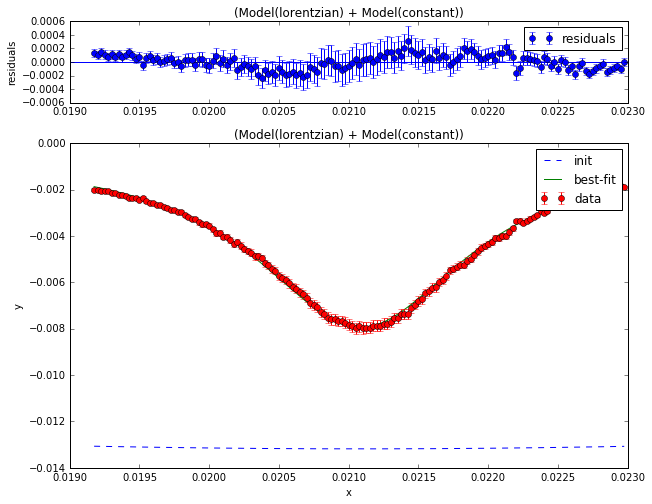

In [117]:
out_druck_4.plot()
plt.show()

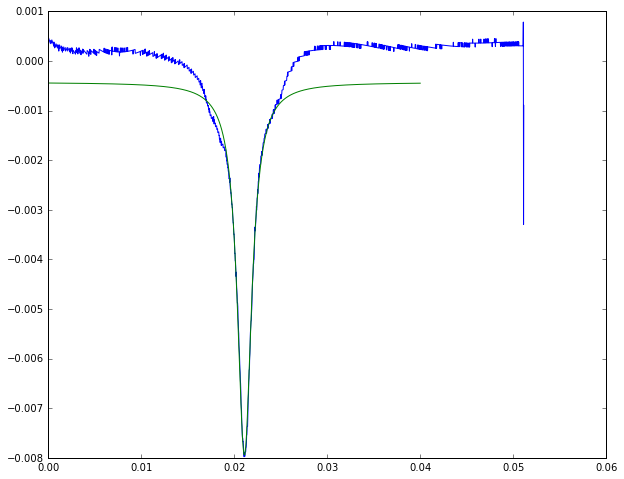

In [118]:
plt.plot(druck_4[0],druck_4_new)
plt.plot(np.arange(0,0.04,0.00001),out_druck_4.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 5

#### Untergrund

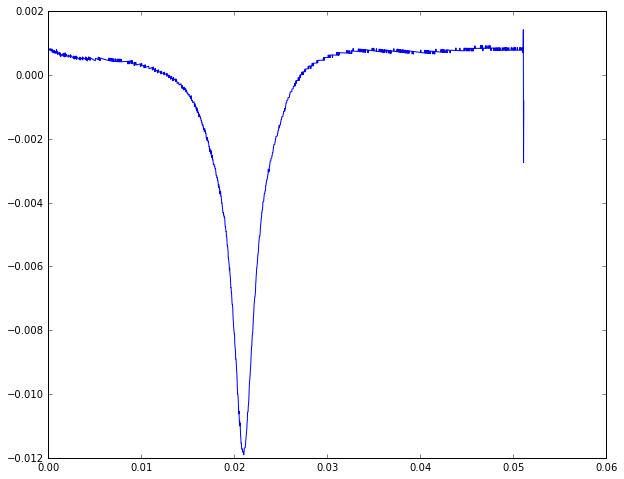

In [119]:
plt.plot(druck_5[0],druck_5[1]-out_underground_druck_2.eval(x=druck_5[0]))
plt.show()

In [120]:
druck_5_new = druck_5[1]-out_underground_druck_2.eval(x=druck_5[0])

#### Fit

In [121]:
mask_druck_5 = np.where(druck_5[0][np.where(druck_5[0] < 0.0248)[0]] > 0.018)[0]

In [122]:
mod_druck_5 = LorentzianModel()
mod_const_druck_5 = ConstantModel()

In [123]:
pars_druck_5 = mod_druck_5.guess(druck_5_new[mask_druck_5],x=druck_5[0][mask_druck_5])
pars_druck_5 += mod_const_druck_5.make_params()
pars_druck_5["c"].set(-0.01)
pars_druck_5["amplitude"].set(-5.9266e-05)
pars_druck_5["center"].set(0.021)
pars_druck_5["sigma"].set(0.03)

In [124]:
mod_composit_druck_5 = mod_druck_5 + mod_const_druck_5

In [125]:
out_druck_5 = mod_composit_druck_5.fit(druck_5_new[mask_druck_5], params=pars_druck_5, x=druck_5[0][mask_druck_5], weights=1/(druck_5_new[mask_druck_5]*0.03))

In [126]:
print(out_druck_5.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 408
    # data points      = 271
    # variables        = 4
    chi-square         = 380.724
    reduced chi-square = 1.426
[[Variables]]
    sigma:       0.00157233 +/- 1.40e-05 (0.89%) (init= 0.03)
    fwhm:        0.00314466 +/- 2.79e-05 (0.89%)  == '2.0000000*sigma'
    amplitude:  -5.5467e-05 +/- 4.98e-07 (0.90%) (init=-5.9266e-05)
    center:      0.02092747 +/- 4.51e-06 (0.02%) (init= 0.021)
    c:          -0.00020568 +/- 3.59e-05 (17.43%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.966 
    C(sigma, c)                  =  0.878 
    C(sigma, amplitude)          = -0.868 
    C(center, c)                 =  0.221 
    C(amplitude, center)         = -0.178 
    C(sigma, center)             =  0.108 



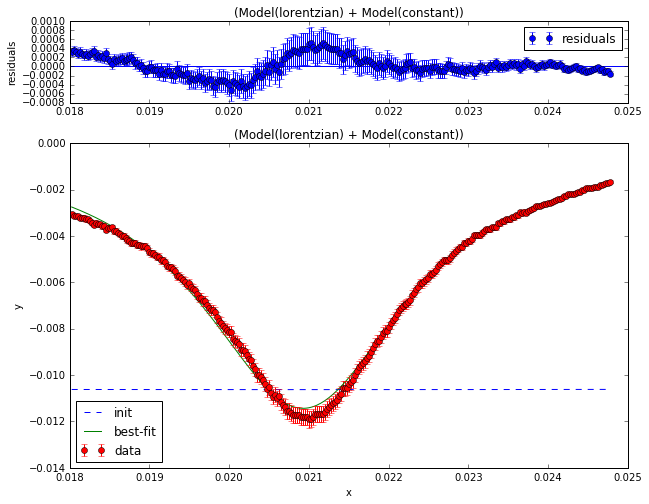

In [127]:
out_druck_5.plot()
plt.legend(loc='best')
plt.show()

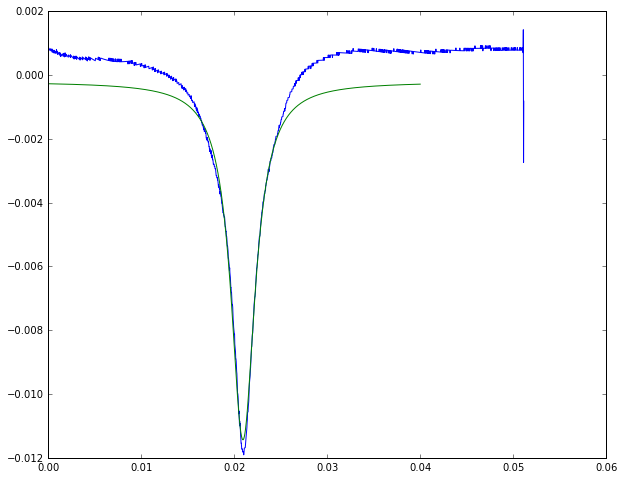

In [128]:
plt.plot(druck_5[0],druck_5_new)
plt.plot(np.arange(0,0.04,0.00001),out_druck_5.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 6

#### Untergrund

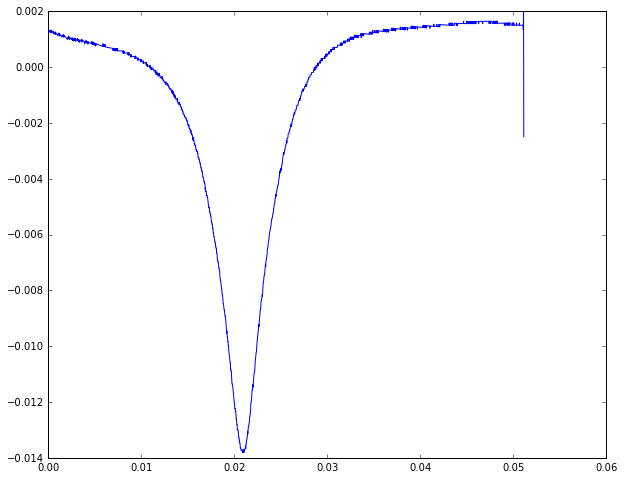

In [129]:
plt.plot(druck_6[0],druck_6[1]-out_underground_druck_2.eval(x=druck_6[0]))
plt.show()

In [130]:
druck_6_new = druck_6[1]-out_underground_druck_2.eval(x=druck_6[0])

#### Fit

In [131]:
mask_druck_6 = np.where(druck_6[0][np.where(druck_6[0] < 0.0255)[0]] > 0.01625)[0]

In [132]:
mod_druck_6 = LorentzianModel()
mod_const_druck_6 = ConstantModel()

In [133]:
pars_druck_6 = mod_druck_6.guess(druck_6_new[mask_druck_6],x=druck_6[0][mask_druck_6])
pars_druck_6 += mod_const_druck_6.make_params()
pars_druck_6["c"].set(-0.01)
pars_druck_6["amplitude"].set(-5.9266e-05)
pars_druck_6["center"].set(0.021)
pars_druck_6["sigma"].set(0.0003)

In [134]:
mod_composit_druck_6 = mod_druck_6 + mod_const_druck_6

In [135]:
out_druck_6 = mod_composit_druck_6.fit(druck_6_new[mask_druck_6]-0.0008, params=pars_druck_6, x=druck_6[0][mask_druck_6], weights=1/(druck_6_new[mask_druck_6]*0.03))

In [136]:
print(out_druck_6.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 43
    # data points      = 369
    # variables        = 4
    chi-square         = 339.329
    reduced chi-square = 0.930
[[Variables]]
    sigma:       0.00280623 +/- 2.50e-05 (0.89%) (init= 0.0003)
    fwhm:        0.00561247 +/- 5.00e-05 (0.89%)  == '2.0000000*sigma'
    amplitude:  -0.00012309 +/- 1.48e-06 (1.21%) (init=-5.9266e-05)
    center:      0.02080467 +/- 4.59e-06 (0.02%) (init= 0.021)
    c:          -0.00022114 +/- 7.24e-05 (32.76%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.992 
    C(sigma, amplitude)          = -0.955 
    C(sigma, c)                  =  0.946 



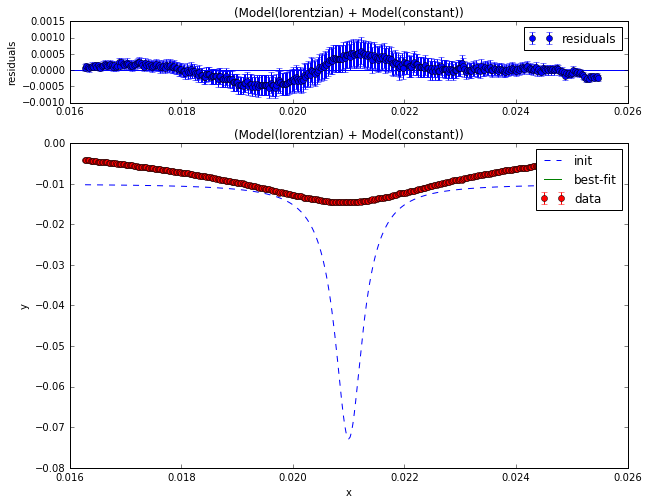

In [137]:
out_druck_6.plot()
plt.show()

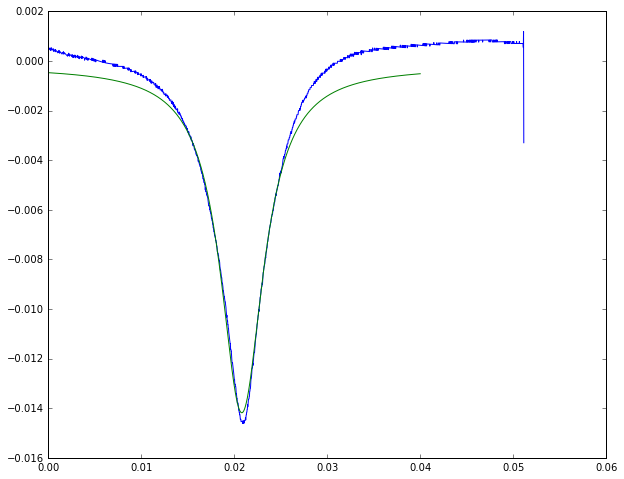

In [138]:
plt.plot(druck_6[0],druck_6_new-0.0008)
plt.plot(np.arange(0,0.04,0.00001),out_druck_6.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 7

#### Untergrund

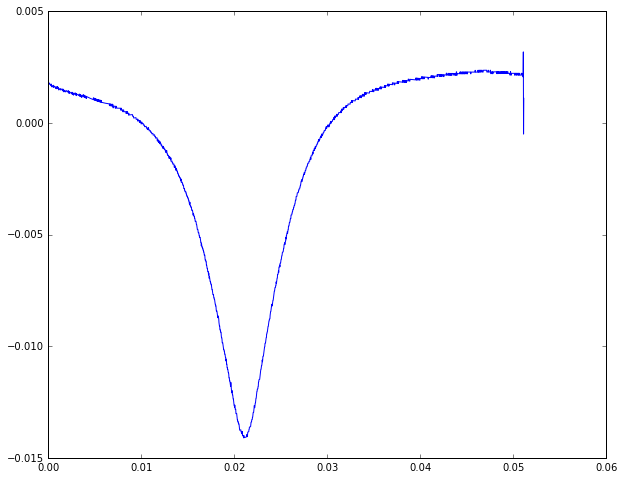

In [139]:
plt.plot(druck_7[0],druck_7[1]-out_underground_druck_2.eval(x=druck_7[0]))
plt.show()

In [140]:
druck_7_new = druck_7[1]-out_underground_druck_2.eval(x=druck_7[0])

#### Fit

In [141]:
mask_druck_7 = np.where(druck_7[0][np.where(druck_7[0] < 0.027)[0]] > 0.015)[0]

In [142]:
mod_druck_7 = LorentzianModel()
mod_const_druck_7 = ConstantModel()

In [143]:
mod_composit_druck_7 = mod_druck_7 + mod_const_druck_7

In [144]:
pars_druck_7 = mod_druck_7.guess(druck_7_new[mask_druck_7],x=druck_7[0][mask_druck_7])
pars_druck_7 += mod_const_druck_7.make_params()
pars_druck_7["c"].set(-0.01)
pars_druck_7["amplitude"].set(-5.9266e-05)
pars_druck_7["center"].set(0.021)
pars_druck_7["sigma"].set(0.000003)

In [145]:
out_druck_7 = mod_composit_druck_7.fit(druck_7_new[mask_druck_7]-0.0011, params=pars_druck_7, x=druck_7[0][mask_druck_7], weights=1/(druck_7_new[mask_druck_7]*0.03))

In [146]:
print(out_druck_7.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 78
    # data points      = 479
    # variables        = 4
    chi-square         = 368.438
    reduced chi-square = 0.776
[[Variables]]
    sigma:       0.00412140 +/- 3.15e-05 (0.76%) (init= 3e-06)
    fwhm:        0.00824281 +/- 6.29e-05 (0.76%)  == '2.0000000*sigma'
    amplitude:  -0.00019992 +/- 2.26e-06 (1.13%) (init=-5.9266e-05)
    center:      0.02095562 +/- 4.62e-06 (0.02%) (init= 0.021)
    c:           0.00067156 +/- 7.96e-05 (11.85%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.995 
    C(sigma, amplitude)          = -0.969 
    C(sigma, c)                  =  0.960 



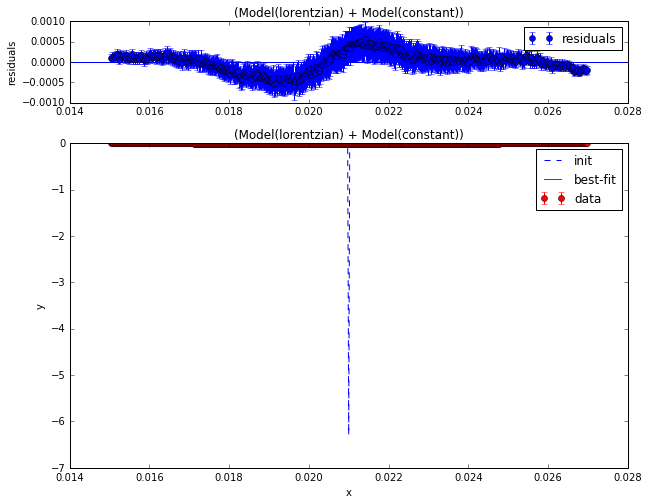

In [147]:
out_druck_7.plot()
plt.show()

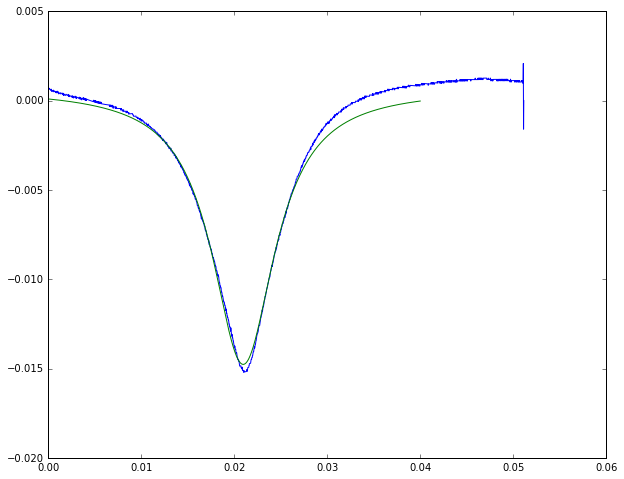

In [148]:
plt.plot(druck_7[0],druck_7_new-0.0011)
plt.plot(np.arange(0,0.04,0.00001),out_druck_7.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 8

#### Untergrund

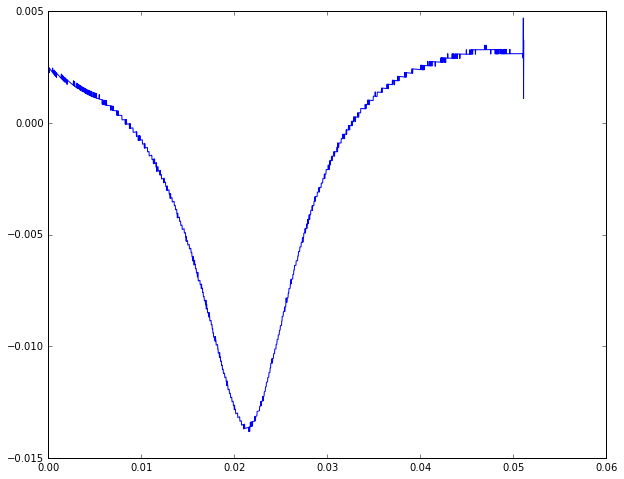

In [149]:
plt.plot(druck_8[0],druck_8[1]-out_underground_druck_2.eval(x=druck_8[0]))
plt.show()

In [150]:
druck_8_new = druck_8[1]-out_underground_druck_2.eval(x=druck_8[0])

#### Fit

In [151]:
mask_druck_8 = np.where(druck_8[0][np.where(druck_8[0] < 0.04)[0]] > 0.015)[0]

In [152]:
mod_druck_8 = LorentzianModel()
mod_const_druck_8 = ConstantModel()

In [153]:
mod_composit_druck_8 = mod_druck_8 + mod_const_druck_8

In [154]:
pars_druck_8 = mod_druck_8.guess(druck_8_new[mask_druck_8],x=druck_8[0][mask_druck_8])
pars_druck_8 += mod_const_druck_8.make_params()
pars_druck_8["c"].set(-0.01)
pars_druck_8["amplitude"].set(-5.9266e-05)
pars_druck_8["center"].set(0.021, vary=True)
pars_druck_8["sigma"].set(0.000003)

In [155]:
out_druck_8 = mod_composit_druck_8.fit(druck_8_new[mask_druck_8]-0.0011, params=pars_druck_8, x=druck_8[0][mask_druck_8], weights=1/(druck_8_new[mask_druck_8]*0.05))

In [156]:
print(out_druck_8.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 85
    # data points      = 999
    # variables        = 4
    chi-square         = 7461.709
    reduced chi-square = 7.499
[[Variables]]
    sigma:       0.00649954 +/- 5.71e-05 (0.88%) (init= 3e-06)
    fwhm:        0.01299909 +/- 0.000114 (0.88%)  == '2.0000000*sigma'
    amplitude:  -0.00036587 +/- 2.68e-06 (0.73%) (init=-5.9266e-05)
    center:      0.02121198 +/- 3.10e-05 (0.15%) (init= 0.021)
    c:           0.00326261 +/- 3.98e-05 (1.22%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.910 
    C(sigma, c)                  =  0.850 
    C(sigma, amplitude)          = -0.780 
    C(amplitude, center)         =  0.603 
    C(sigma, center)             = -0.583 
    C(center, c)                 = -0.321 



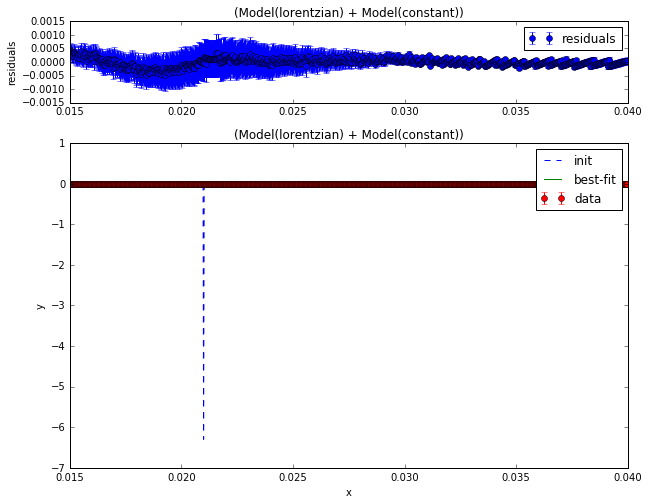

In [157]:
out_druck_8.plot()
plt.show()

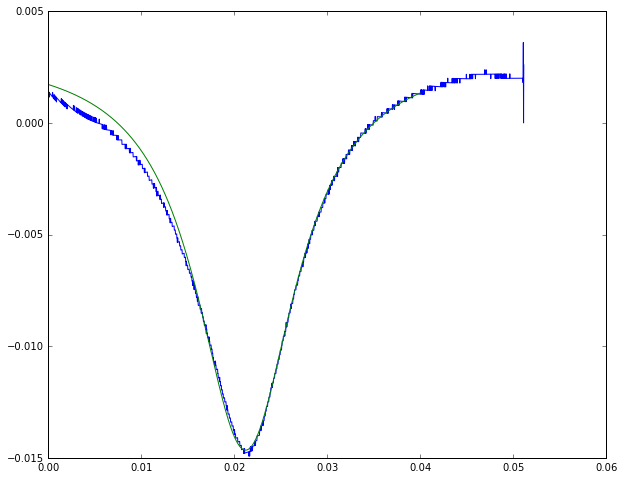

In [158]:
plt.plot(druck_8[0],druck_8_new-0.0011)
plt.plot(np.arange(0,0.04,0.00001),out_druck_8.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 9

#### Untergrund

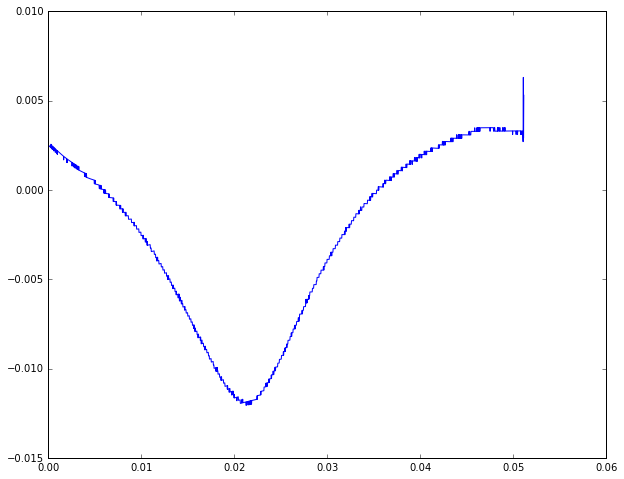

In [159]:
plt.plot(druck_9[0],druck_9[1]-out_underground_druck_2.eval(x=druck_9[0]))
plt.show()

In [160]:
druck_9_new = druck_9[1]-out_underground_druck_2.eval(x=druck_9[0])

#### Fit

In [161]:
mask_druck_9 = np.where(druck_9[0][np.where(druck_9[0] < 0.046)[0]] > 0.003)[0]

In [162]:
mod_druck_9 = LorentzianModel()
mod_const_druck_9 = ConstantModel()

In [163]:
pars_druck_9 = mod_druck_9.guess(druck_9_new[mask_druck_9],x=druck_9[0][mask_druck_9])
pars_druck_9 += mod_const_druck_9.make_params()
pars_druck_9["c"].set(-0.01)
pars_druck_9["amplitude"].set(-5.9266e-05)
pars_druck_9["center"].set(0.021)
pars_druck_9["sigma"].set(0.007,vary=True)

In [164]:
mod_composit_druck_9 = mod_druck_9 + mod_const_druck_9

In [165]:
out_druck_9 = mod_composit_druck_9.fit(druck_9_new[mask_druck_9], params=pars_druck_9, x=druck_9[0][mask_druck_9], weights=1/(druck_9_new[mask_druck_9]*0.02))

In [166]:
print(out_druck_9.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 84
    # data points      = 1719
    # variables        = 4
    chi-square         = 526834.615
    reduced chi-square = 307.192
[[Variables]]
    sigma:       0.00828770 +/- 0.000127 (1.53%) (init= 0.007)
    fwhm:        0.01657540 +/- 0.000253 (1.53%)  == '2.0000000*sigma'
    amplitude:  -0.00042180 +/- 4.88e-06 (1.16%) (init=-5.9266e-05)
    center:      0.02074566 +/- 2.64e-06 (0.01%) (init= 0.021)
    c:           0.00392686 +/- 6.91e-05 (1.76%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.937 
    C(sigma, c)                  =  0.857 
    C(sigma, amplitude)          = -0.622 
    C(amplitude, center)         =  0.121 
    C(center, c)                 = -0.116 



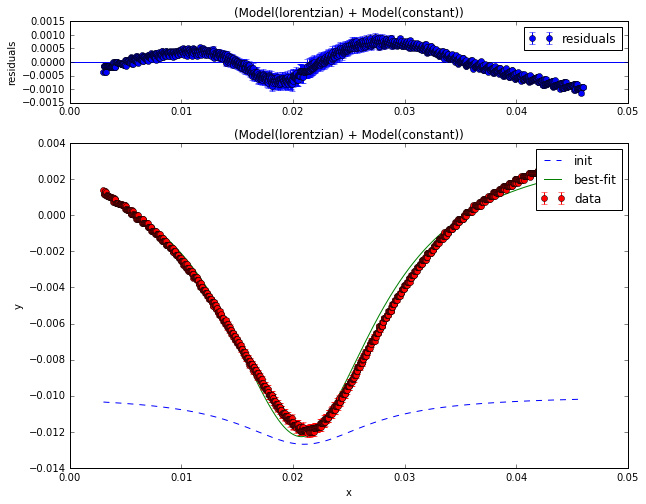

In [167]:
out_druck_9.plot()
plt.show()

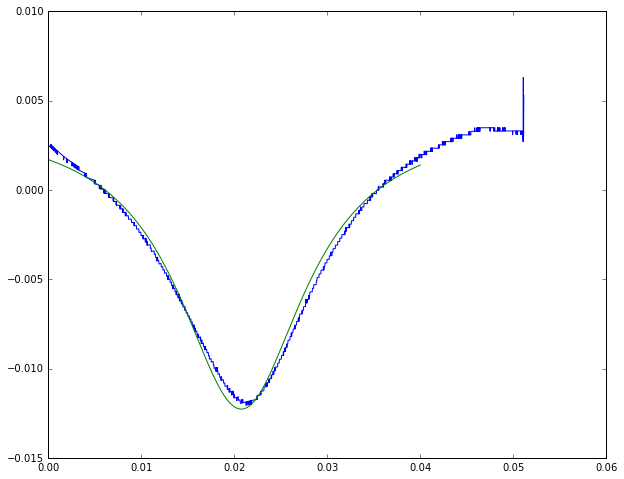

In [168]:
plt.plot(druck_9[0],druck_9_new)
plt.plot(np.arange(0,0.04,0.00001),out_druck_9.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 10

#### Untergrund

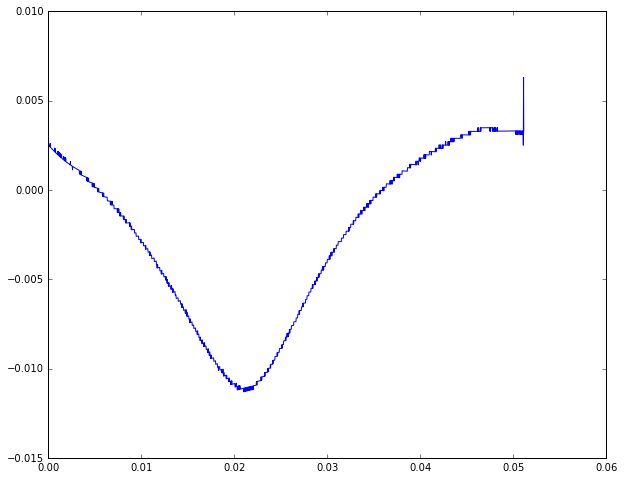

In [169]:
plt.plot(druck_10[0],druck_10[1]-out_underground_druck_2.eval(x=druck_10[0]))
plt.show()

In [170]:
druck_10_new = druck_10[1]-out_underground_druck_2.eval(x=druck_10[0])

### Fit

In [171]:
mask_druck_10 = np.where(druck_10[0][np.where(druck_10[0] < 0.032)[0]] > 0.009)[0]

In [172]:
mod_druck_10 = LorentzianModel()
mod_const_druck_10 = ConstantModel()

In [173]:
pars_druck_10 = mod_druck_10.guess(druck_10_new[mask_druck_10],x=druck_10[0][mask_druck_10])
pars_druck_10 += mod_const_druck_10.make_params()
pars_druck_10["c"].set(-0.01)
pars_druck_10["amplitude"].set(-5.9266e-05)
pars_druck_10["center"].set(0.021)
pars_druck_10["sigma"].set(0.0001)

In [174]:
mod_composit_druck_10 = mod_druck_10 + mod_const_druck_10

In [175]:
out_druck_10 = mod_composit_druck_10.fit(druck_10_new[mask_druck_10]-0.002, params=pars_druck_10, x=druck_10[0][mask_druck_10], weights=1/(druck_10_new[mask_druck_10]*0.02))

In [176]:
print(out_druck_10.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 58
    # data points      = 919
    # variables        = 4
    chi-square         = 1087.745
    reduced chi-square = 1.189
[[Variables]]
    sigma:       0.00997449 +/- 5.07e-05 (0.51%) (init= 0.0001)
    fwhm:        0.01994898 +/- 0.000101 (0.51%)  == '2.0000000*sigma'
    amplitude:  -0.00047786 +/- 4.20e-06 (0.88%) (init=-5.9266e-05)
    center:      0.02077592 +/- 4.73e-06 (0.02%) (init= 0.021)
    c:           0.00221470 +/- 6.70e-05 (3.02%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.998 
    C(sigma, amplitude)          = -0.984 
    C(sigma, c)                  =  0.977 
    C(center, c)                 = -0.114 
    C(amplitude, center)         =  0.109 



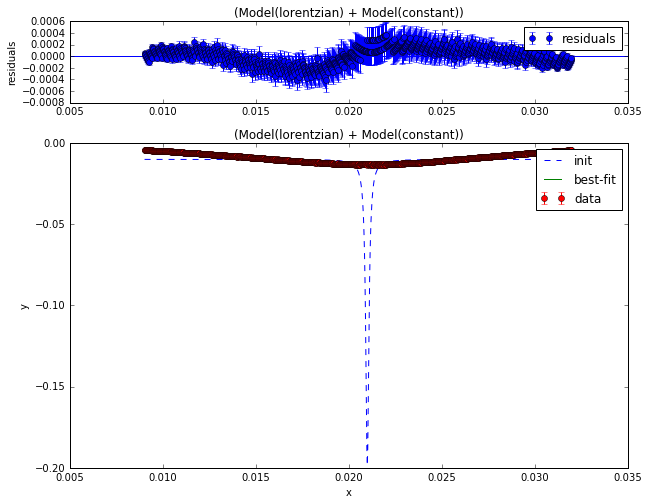

In [177]:
out_druck_10.plot()
plt.show()

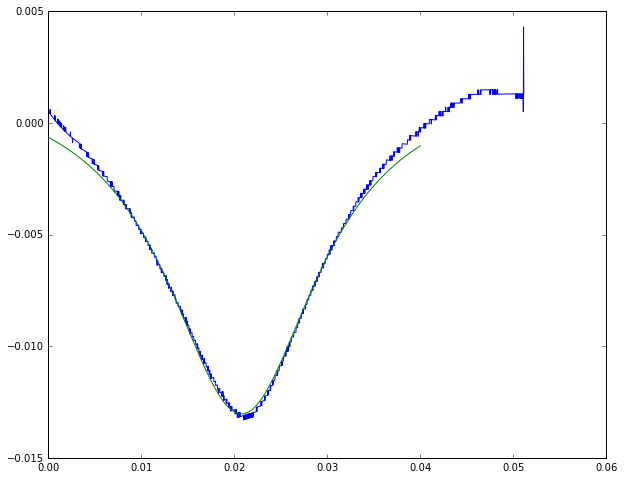

In [178]:
plt.plot(druck_10[0],druck_10_new-0.002)
plt.plot(np.arange(0,0.04,0.00001),out_druck_10.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 11

#### Untergrund

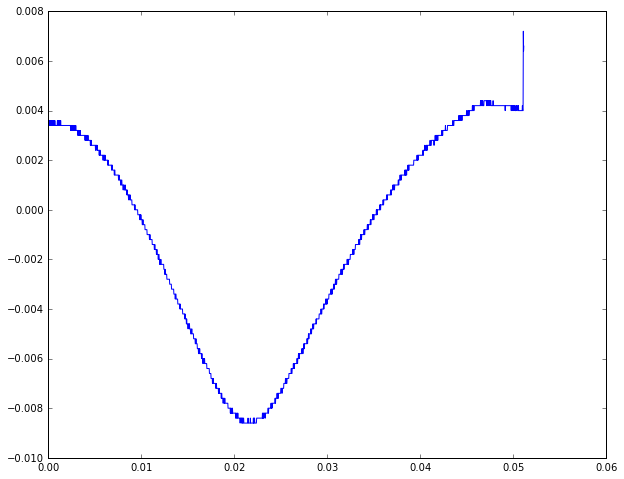

In [179]:
plt.plot(druck_11[0],druck_11[1])
plt.show()

In [180]:
druck_11_new = druck_11[1]

#### Fit

In [181]:
mask_druck_11 = np.where(druck_11[0][np.where(druck_11[0] < 0.033)[0]] > 0.0114)[0]

In [182]:
mod_druck_11 = LorentzianModel()
mod_const_druck_11 = ConstantModel()

In [183]:
pars_druck_11 = mod_druck_11.guess(druck_11_new[mask_druck_11],x=druck_11[0][mask_druck_11])
pars_druck_11 += mod_const_druck_11.make_params()
pars_druck_11["c"].set(-0.01)
pars_druck_11["amplitude"].set(-5.9266e-05)
pars_druck_11["center"].set(0.021)
pars_druck_11["sigma"].set(0.00001)

In [184]:
mod_composit_druck_11 = mod_druck_11 + mod_const_druck_11

In [185]:
out_druck_11 = mod_composit_druck_11.fit(druck_11_new[mask_druck_11], params=pars_druck_11, x=druck_11[0][mask_druck_11], weights=(1/((druck_11_new[mask_druck_11]++0.00001)*0.02)))

In [186]:
print(out_druck_11.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 74
    # data points      = 863
    # variables        = 4
    chi-square         = 2982.741
    reduced chi-square = 3.472
[[Variables]]
    sigma:       0.01124635 +/- 0.000113 (1.00%) (init= 1e-05)
    fwhm:        0.02249271 +/- 0.000225 (1.00%)  == '2.0000000*sigma'
    amplitude:  -0.00051044 +/- 9.88e-06 (1.94%) (init=-5.9266e-05)
    center:      0.02200069 +/- 6.75e-06 (0.03%) (init= 0.021)
    c:           0.00594950 +/- 0.000149 (2.50%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.999 
    C(sigma, amplitude)          = -0.991 
    C(sigma, c)                  =  0.986 



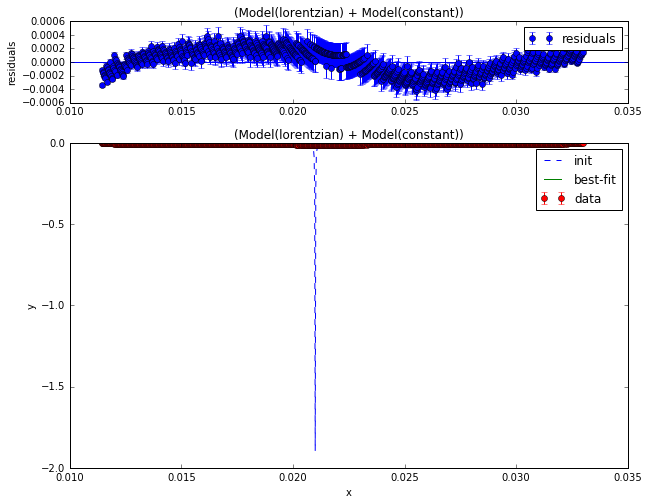

In [187]:
out_druck_11.plot()
plt.show()

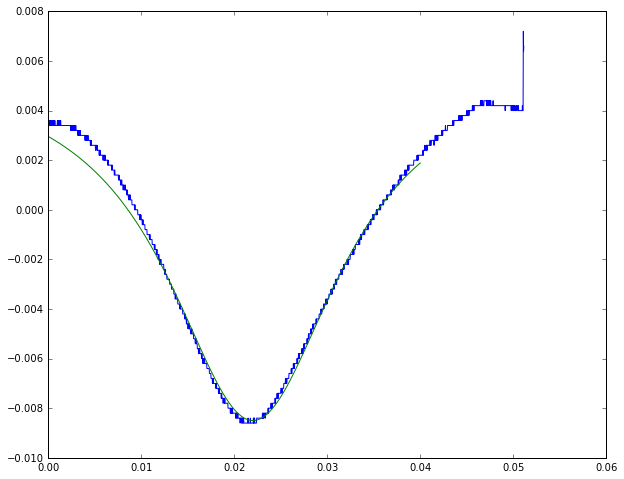

In [188]:
plt.plot(druck_11[0],druck_11_new)
plt.plot(np.arange(0,0.04,0.00001),out_druck_11.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 12

#### Untergrund

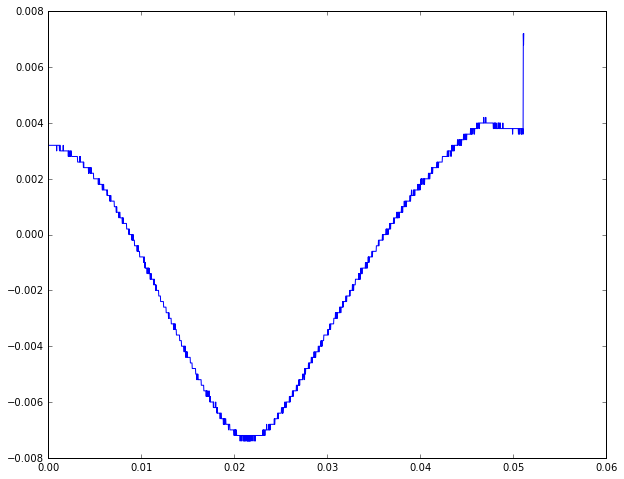

In [189]:
plt.plot(druck_12[0],druck_12[1])
plt.show()

In [190]:
druck_12_new = druck_12[1]

#### Fit

In [191]:
mask_druck_12 = np.where(druck_12[0][np.where(druck_12[0] < 0.033)[0]] > 0.0114)[0]

In [192]:
mod_druck_12 = LorentzianModel()
mod_const_druck_12 = ConstantModel()

In [193]:
pars_druck_12 = mod_druck_12.guess(druck_12_new[mask_druck_12],x=druck_12[0][mask_druck_12])
pars_druck_12 += mod_const_druck_12.make_params()
pars_druck_12["c"].set(-0.01)
pars_druck_12["amplitude"].set(-5.9266e-05)
pars_druck_12["center"].set(0.021)
pars_druck_12["sigma"].set(0.0001)

In [194]:
mod_composit_druck_12 = mod_druck_12 + mod_const_druck_12

In [195]:
out_druck_12 = mod_composit_druck_12.fit(druck_12_new[mask_druck_12], params=pars_druck_12, x=druck_12[0][mask_druck_12], weights=(1/((druck_12_new[mask_druck_11]++0.00001)*0.02)))

In [196]:
print(out_druck_12.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 81
    # data points      = 863
    # variables        = 4
    chi-square         = 1997.858
    reduced chi-square = 2.326
[[Variables]]
    sigma:       0.01245460 +/- 0.000137 (1.10%) (init= 0.0001)
    fwhm:        0.02490921 +/- 0.000274 (1.10%)  == '2.0000000*sigma'
    amplitude:  -0.00049499 +/- 1.13e-05 (2.28%) (init=-5.9266e-05)
    center:      0.02195080 +/- 6.87e-06 (0.03%) (init= 0.021)
    c:           0.00540525 +/- 0.000159 (2.95%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -0.999 
    C(sigma, amplitude)          = -0.994 
    C(sigma, c)                  =  0.990 
    C(center, c)                 =  0.105 
    C(amplitude, center)         = -0.101 



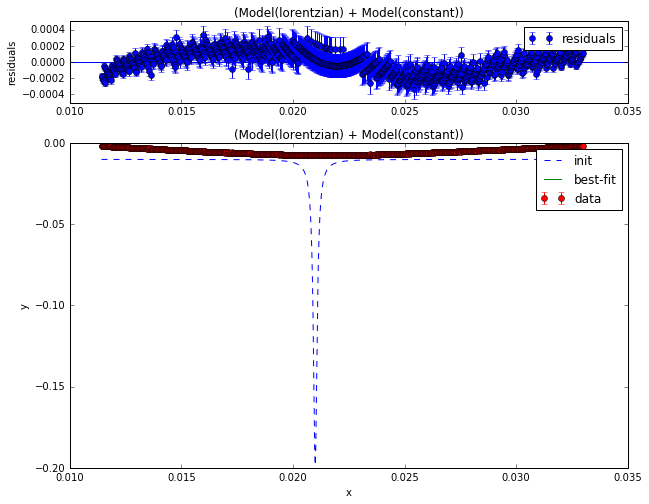

In [197]:
out_druck_12.plot()
plt.show()

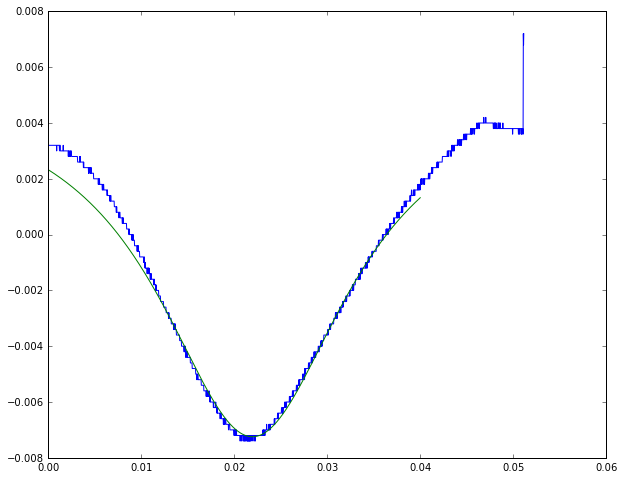

In [198]:
plt.plot(druck_12[0],druck_12_new)
plt.plot(np.arange(0,0.04,0.00001),out_druck_12.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

### Druck 13

#### Untergrund

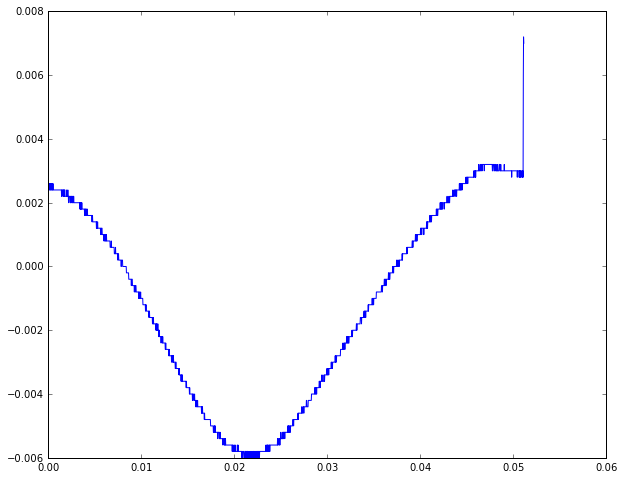

In [199]:
plt.plot(druck_13[0],druck_13[1])
plt.show()

In [200]:
druck_13_new = druck_13[1]

#### Fit

In [201]:
mask_druck_13 = np.where(druck_13[0][np.where(druck_13[0] < 0.025)[0]] > 0.015)[0]

In [202]:
mod_druck_13 = LorentzianModel()
mod_const_druck_13 = ConstantModel()

In [203]:
pars_druck_13 = mod_druck_13.guess(druck_13_new[mask_druck_13],x=druck_13[0][mask_druck_13])
pars_druck_13 += mod_const_druck_13.make_params()
pars_druck_13["c"].set(-0.01)
pars_druck_13["amplitude"].set(-5.9266e-05)
pars_druck_13["center"].set(0.021)
pars_druck_13["sigma"].set(0.00001)

In [204]:
mod_composit_druck_13 = mod_druck_13 + mod_const_druck_13

In [205]:
out_druck_13 = mod_composit_druck_13.fit(druck_13_new[mask_druck_13], params=pars_druck_13, x=druck_13[0][mask_druck_13], weights=(1/((druck_13_new[mask_druck_13]+0.00001)*0.02)))

In [206]:
print(out_druck_13.fit_report())

[[Model]]
    (Model(lorentzian) + Model(constant))
[[Fit Statistics]]
    # function evals   = 312
    # data points      = 399
    # variables        = 4
    chi-square         = 219.517
    reduced chi-square = 0.556
[[Variables]]
    sigma:       0.01643498 +/- 0.001401 (8.52%) (init= 1e-05)
    fwhm:        0.03286997 +/- 0.002802 (8.52%)  == '2.0000000*sigma'
    amplitude:  -0.00073734 +/- 0.000171 (23.15%) (init=-5.9266e-05)
    center:      0.02183337 +/- 2.54e-05 (0.12%) (init= 0.021)
    c:           0.00838229 +/- 0.002094 (24.99%) (init=-0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, c)              = -1.000 
    C(sigma, amplitude)          = -0.999 
    C(sigma, c)                  =  0.998 
    C(sigma, center)             =  0.272 
    C(amplitude, center)         = -0.239 
    C(center, c)                 =  0.221 



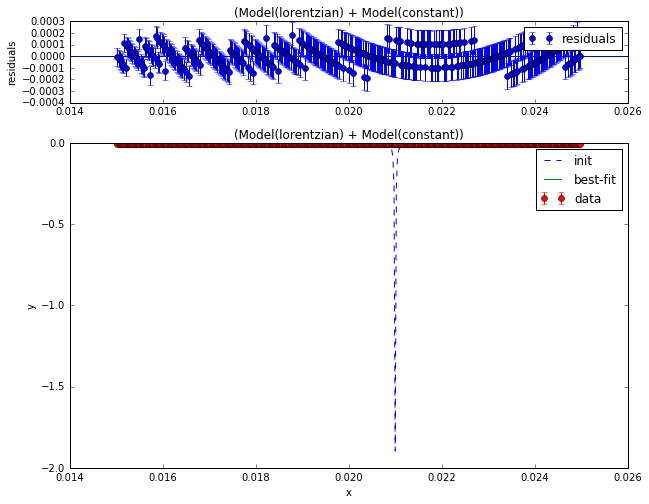

In [207]:
out_druck_13.plot()
plt.show()

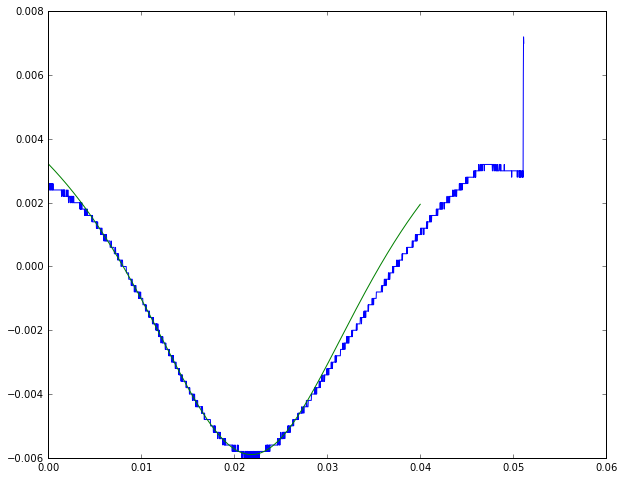

In [208]:
plt.plot(druck_13[0],druck_13_new)
plt.plot(np.arange(0,0.04,0.00001),out_druck_13.eval(x=np.arange(0,0.04,0.00001)))
plt.show()

## Breite zu Druck

In [209]:
breite = []
breite.append(out_druck_2.best_values["sigma"])
breite.append(out_druck_3.best_values["sigma"])
breite.append(out_druck_4.best_values["sigma"])
breite.append(out_druck_5.best_values["sigma"])
breite.append(out_druck_6.best_values["sigma"])
breite.append(out_druck_7.best_values["sigma"])
breite.append(out_druck_8.best_values["sigma"])
breite.append(out_druck_9.best_values["sigma"])
breite.append(out_druck_10.best_values["sigma"])
breite.append(out_druck_11.best_values["sigma"])
breite.append(out_druck_12.best_values["sigma"])
breite.append(out_druck_13.best_values["sigma"])
breite = np.array(breite)*2
breite_hz = out_kalib_druck.best_values["slope"]*breite*2

In [210]:
breite_hz*1000

array([  1.68606719,   1.64549039,   2.24684591,   3.79030291,
         6.7647924 ,   9.93518256,  15.66799147,  19.97856349,
        24.0447916 ,  27.11077863,  30.02342125,  39.61863434])

In [211]:
druck = np.array([1.0*10**-2,
                  2.6*10**-2,
                  8.7*10**-2,
                  1.5*10**-1,
                  2.7*10**-1,
                  3.8*10**-1,
                  5.8*10**-1,
                  9.3*10**-1,
                  1.1,
                  1.3,
                  1.6,
                  2.0])

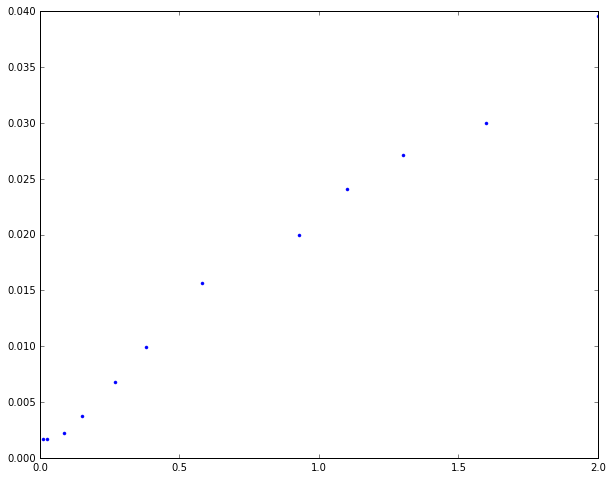

In [212]:
plt.plot(druck,breite_hz, '. ')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.show()

In [213]:
mod_druck_breite = LinearModel()

In [214]:
pars_druck_breite = mod_druck_breite.guess(breite_hz,x=druck)

In [215]:
out_druck_breite = mod_druck_breite.fit(breite_hz,x=druck,params=pars_druck_breite,weights=1/(breite_hz*0.000024))

In [216]:
print(out_druck_breite.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 12
    # variables        = 2
    chi-square         = 334229217.399
    reduced chi-square = 33422921.740
[[Variables]]
    slope:       0.01965763 +/- 0.001096 (5.58%) (init= 0.01902412)
    intercept:   0.00115401 +/- 0.000152 (13.14%) (init= 0.001840203)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -0.434 



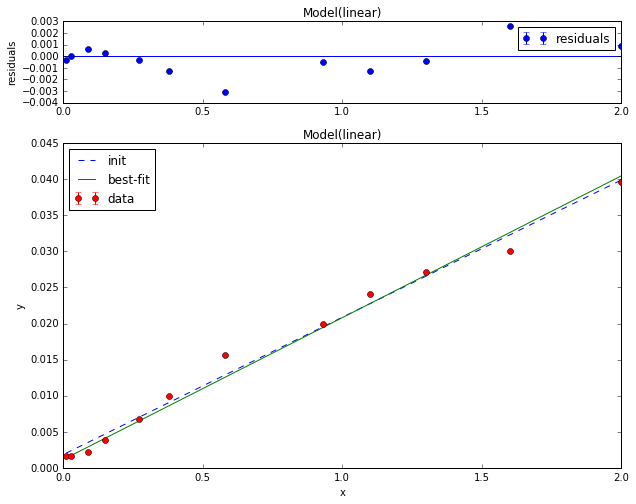

In [217]:
out_druck_breite.plot()
plt.legend(loc="best")
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.show()

In [218]:
breite

array([ 0.00139886,  0.0013652 ,  0.00186412,  0.00314466,  0.00561247,
        0.00824282,  0.0129991 ,  0.0165754 ,  0.01994899,  0.02249271,
        0.02490921,  0.03286997])

In [219]:
(300/273)**0.5*19.65

20.598797041585694